# Agricultural Raw Material prices (1990-2020)

This is a dataset is on *Agricultural Raw materials prices over a span of 30 years (1990-2020)*. You can find this dataset on [Kaggle](https://www.kaggle.com/kianwee/agricultural-raw-material-prices-19902020). Mainly this dataset contains information about the **prices** and the **percent change in the prices from the previous month**. The prices are present for every month. So we are going to analyse this dataset to get the *distribution of the prices* and *the distribution of the change in prices*. We also want to gain some insights regarding *the months when the prices of most of the materials falls*. We will also like to see the trends in the prices. 

*This dataset contains information about 12 Agricultural Raw Materials.*

- **Coarse wool**
- **Copra**
- **Cotton**
- **Fine wool**
- **Hardlog**
- **Hard sawnwood**
- **Hide**
- **Plywood**
- **Rubber**
- **Softlog**
- **Soft sawnwood**
- **Wood pulp**

For each material we have two columns: **Prices** and **%change**. Along with all these columns we have another one column named **Date** which contains month and year of which the price is. This is a course project for the online course at [Jovian.ml](https://jovian.ml/) named [Data Analysis with Python: Zero to Pandas](https://jovian.ml/learn/data-analysis-with-python-zero-to-pandas).

### How to run the code

This is an executable [*Jupyter notebook*](https://jupyter.org) hosted on [Jovian.ml](https://www.jovian.ml), a platform for sharing data science projects. You can run and experiment with the code in a couple of ways: *using free online resources* (recommended) or *on your own computer*.

#### Option 1: Running using free online resources (1-click, recommended)

The easiest way to start executing this notebook is to click the "Run" button at the top of this page, and select "Run on Binder". This will run the notebook on [mybinder.org](https://mybinder.org), a free online service for running Jupyter notebooks. You can also select "Run on Colab" or "Run on Kaggle".


#### Option 2: Running on your computer locally

1. Install Conda by [following these instructions](https://conda.io/projects/conda/en/latest/user-guide/install/index.html). Add Conda binaries to your system `PATH`, so you can use the `conda` command on your terminal.

2. Create a Conda environment and install the required libraries by running these commands on the terminal:

```
conda create -n zerotopandas -y python=3.8 
conda activate zerotopandas
pip install jovian jupyter numpy pandas matplotlib seaborn opendatasets --upgrade
```

3. Press the "Clone" button above to copy the command for downloading the notebook, and run it on the terminal. This will create a new directory and download the notebook. The command will look something like this:

```
jovian clone notebook-owner/notebook-id
```



4. Enter the newly created directory using `cd directory-name` and start the Jupyter notebook.

```
jupyter notebook
```

You can now access Jupyter's web interface by clicking the link that shows up on the terminal or by visiting http://localhost:8888 on your browser. Click on the notebook file (it has a `.ipynb` extension) to open it.

## Downloading the dataset

As the dataset is present in the  [`opendatasets` Python library](https://github.com/JovianML/opendatasets#opendatasets) so we are going to download it directly from there using the `opendatasets.download()` command

In [1]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [2]:
# Dataset url
dataset_url = 'https://www.kaggle.com/kianwee/agricultural-raw-material-prices-19902020' 

In [3]:
import opendatasets as od
od.download(dataset_url)

Kaggle dataset ID:  kianwee/agricultural-raw-material-prices-19902020


0it [00:00, ?it/s]

24576it [00:02, 12109.03it/s]                                                                                          

Extracting archive .\agricultural-raw-material-prices-19902020.zip to .\agricultural-raw-material-prices-19902020


In [4]:
# Dataset directory path
data_dir = r'.\agricultural-raw-material-prices-19902020'

In [5]:
import os
os.listdir(data_dir)

['agricultural_raw_material.csv']

Let us save and upload our work to Jovian before continuing.

In [138]:
# Name of the project by which we are going to save this at Jovian
project_name = "agricultural-raw-material-prices"

In [7]:
!pip install jovian --upgrade -q

In [ ]:
import jovian
jovian.commit(project=project_name)

## Data Preparation and Cleaning

In this step we are going to prepare our data for the further analysis. We will look at the overall view of the dataset, look for null values, outliers (if any). We will try to remove those null values and outliers to make the upcoming analysis easier for us.<br>
We are going to import the dataset into a `pandas.DataFrame` and do the cleaning.

Let's first import the required libraries for this session

In [1]:
import numpy as np
import pandas as pd

Now let's read the dataset into a DataFrame named `prices_df`

In [2]:
prices_df = pd.read_csv(r'.\agricultural-raw-material-prices-19902020\agricultural_raw_material.csv')
prices_df.head(10)

Month Coarse wool Price Coarse wool price % Change Copra Price  \
0  Apr-90            482.34                          -         236   
1  May-90            447.26                     -7.27%         234   
2  Jun-90            440.99                     -1.40%         216   
3  Jul-90            418.44                     -5.11%         205   
4  Aug-90            418.44                      0.00%         198   
5  Sep-90            412.18                     -1.50%         196   
6  Oct-90            394.64                     -4.26%         198   
7  Nov-90             334.5                    -15.24%         236   
8  Dec-90            328.24                     -1.87%         237   
9  Jan-91            319.47                     -2.67%         233   

  Copra price % Change  Cotton Price Cotton price % Change Fine wool Price  \
0                    -          1.83                     -        1,071.63   
1               -0.85%          1.89                 3.28%        1,057.18   
2               -7.69%          1.99                 5.29%          898.24   
3               -5.09%          2.01                 1.01%          895.83   
4               -3.41%          1.79               -10.95%          951.22   
5               -1.01%          1.79                 0.00%          936.77   
6                1.02%          1.79                 0.00%          901.85   
7               19.19%          1.82                 1.68%          888.61   
8                0.42%          1.85                 1.65%          870.55   
9               -1.69%          1.85                 0.00%          887.41   

  Fine wool price % Change  Hard log Price  ... Plywood Price  \
0                        -          161.20  ...        312.36   
1                   -1.35%          172.86  ...        350.12   
2                  -15.03%          181.67  ...        373.94   
3                   -0.27%          187.96  ...        378.48   
4                    6.18%          186.13  ...        364.60   
5                   -1.52%          185.33  ...        384.92   
6                   -3.73%          189.76  ...        409.31   
7                   -1.47%          179.02  ...        375.74   
8                   -2.03%          171.13  ...        363.16   
9                    1.94%          169.19  ...        362.26   

   Plywood price % Change Rubber Price  Rubber price % Change Softlog Price  \
0                       -         0.84                      -        120.66   
1                  12.09%         0.85                  1.19%        124.28   
2                   6.80%         0.85                  0.00%        129.45   
3                   1.21%         0.86                  1.18%        124.23   
4                  -3.67%         0.88                  2.33%        129.70   
5                   5.57%         0.90                  2.27%        129.78   
6                   6.34%         0.90                  0.00%        121.31   
7                  -8.20%         0.90                  0.00%        130.50   
8                  -3.35%         0.88                 -2.22%        119.35   
9                  -0.25%         0.87                 -1.14%        126.14   

   Softlog price % Change Soft sawnwood Price  Soft sawnwood price % Change  \
0                       -              218.76                             -   
1                   3.00%              213.00                        -2.63%   
2                   4.16%              200.00                        -6.10%   
3                  -4.03%              210.05                         5.03%   
4                   4.40%              208.30                        -0.83%   
5                   0.06%              199.59                        -4.18%   
6                  -6.53%              206.98                         3.70%   
7                   7.58%              206.64                        -0.16%   
8                  -8.54%              198.22                        -4.07%  

In [13]:
prices_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361 entries, 0 to 360
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Month                         361 non-null    object 
 1   Coarse wool Price             327 non-null    object 
 2   Coarse wool price % Change    327 non-null    object 
 3   Copra Price                   339 non-null    object 
 4   Copra price % Change          339 non-null    object 
 5   Cotton Price                  361 non-null    float64
 6   Cotton price % Change         361 non-null    object 
 7   Fine wool Price               327 non-null    object 
 8   Fine wool price % Change      327 non-null    object 
 9   Hard log Price                361 non-null    float64
 10  Hard log price % Change       361 non-null    object 
 11  Hard sawnwood Price           327 non-null    float64
 12  Hard sawnwood price % Change  327 non-null    object 
 13  Hide 

In [14]:
prices_df.describe()

Cotton Price  Hard log Price  Hard sawnwood Price  Hide Price  \
count    361.000000      361.000000           327.000000  327.000000   
mean       1.640000      251.034072           707.950367   78.566667   
std        0.513319       65.628406           144.563241   13.690623   
min        0.820000      133.280000           413.370000   28.590000   
25%        1.290000      197.960000           573.470000   69.495000   
50%        1.600000      253.010000           728.710000   77.250000   
75%        1.850000      282.970000           831.635000   86.000000   
max        5.060000      520.810000           973.600000  114.630000   

       Plywood Price  Rubber Price  Softlog Price  Soft sawnwood Price  \
count     361.000000    361.000000     327.000000           327.000000   
mean      508.216122      1.656427     164.527462           291.061713   
std        89.274718      1.017086      25.596308            34.113959   
min       312.360000      0.490000     119.350000           183.610000   
25%       442.540000      0.860000     145.970000           277.590000   
50%       505.040000      1.440000     160.370000           294.960000   
75%       570.790000      2.060000     180.210000           310.865000   
max       751.810000      6.260000     259.970000           372.600000   

       Wood pulp Price  
count       360.000000  
mean        696.670889  
std         161.156936  
min         384.000000  
25%         549.777500  
50%         693.580000  
75%         875.000000  
max         966.490000

After studying the dataset and the info() of it we came to know that last values of few columns are empty and if we remove them for the whole dataset then we can loose alot of information. So we are not going to remove them rather we are going to deal with them when we do the EDA (material-wise). <br>

Another point is that all the **%Change** columns are strings not numbers so, we are going to convert them into numbers between 0 to 100.<br>

Another thing is that the **Date** column contains both *month* and *year* together (MMM-YY). So we would like to separate them as it would help us to gain more insights.

One more thing is that there are some **Price** columns that have a mixed type, so first we need to convert them into `float64`

Let's define a function to change the **%Change** column to the desired format.

In [3]:
# function to change the %Change column from string to float
def percent_to_float(percent):
    import math
    if percent == '-':
        return np.nan
    elif type(percent) == float:
        return np.nan
    else:
        percent = percent.rstrip('%')
        num = float(percent)
        return percent
    return np.nan

In [4]:
prices_df.columns

Index(['Month', 'Coarse wool Price', 'Coarse wool price % Change',
       'Copra Price', 'Copra price % Change', 'Cotton Price',
       'Cotton price % Change', 'Fine wool Price', 'Fine wool price % Change',
       'Hard log Price', 'Hard log price % Change', 'Hard sawnwood Price',
       'Hard sawnwood price % Change', 'Hide Price', 'Hide price % change',
       'Plywood Price', 'Plywood price % Change', 'Rubber Price',
       'Rubber price % Change', 'Softlog Price', 'Softlog price % Change',
       'Soft sawnwood Price', 'Soft sawnwood price % Change',
       'Wood pulp Price', 'Wood pulp price % Change'],
      dtype='object')

In [5]:
# Getting the column names on which we need to apply this function percent_to_float
columns = ['Coarse wool price % Change', 'Copra price % Change',
       'Cotton price % Change', 'Fine wool price % Change',
       'Hard log price % Change', 'Hard sawnwood price % Change',
       'Hide price % change', 'Plywood price % Change', 
       'Rubber price % Change',  'Softlog price % Change',
       'Soft sawnwood price % Change',  'Wood pulp price % Change']

In [6]:
for column in columns:
    prices_df[column] = prices_df[column].apply(percent_to_float)
prices_df.head()

Month Coarse wool Price Coarse wool price % Change Copra Price  \
0  Apr-90            482.34                        NaN         236   
1  May-90            447.26                      -7.27         234   
2  Jun-90            440.99                      -1.40         216   
3  Jul-90            418.44                      -5.11         205   
4  Aug-90            418.44                       0.00         198   

  Copra price % Change  Cotton Price Cotton price % Change Fine wool Price  \
0                  NaN          1.83                   NaN        1,071.63   
1                -0.85          1.89                  3.28        1,057.18   
2                -7.69          1.99                  5.29          898.24   
3                -5.09          2.01                  1.01          895.83   
4                -3.41          1.79                -10.95          951.22   

  Fine wool price % Change  Hard log Price  ... Plywood Price  \
0                      NaN          161.20  ...        312.36   
1                    -1.35          172.86  ...        350.12   
2                   -15.03          181.67  ...        373.94   
3                    -0.27          187.96  ...        378.48   
4                     6.18          186.13  ...        364.60   

   Plywood price % Change Rubber Price  Rubber price % Change Softlog Price  \
0                     NaN         0.84                    NaN        120.66   
1                   12.09         0.85                   1.19        124.28   
2                    6.80         0.85                   0.00        129.45   
3                    1.21         0.86                   1.18        124.23   
4                   -3.67         0.88                   2.33        129.70   

   Softlog price % Change Soft sawnwood Price  Soft sawnwood price % Change  \
0                     NaN              218.76                           NaN   
1                    3.00              213.00                         -2.63   
2                    4.16              200.00                         -6.10   
3                   -4.03              210.05                          5.03   
4                    4.40              208.30                         -0.83   

  Wood pulp Price  Wood pulp price % Change  
0          829.29                       NaN  
1          842.51                      1.59  
2          831.35                     -1.32  
3          798.83                     -3.91  
4          818.74                      2.49  

[5 rows x 25 columns]

Now all the **%Change** columns are converted into floats. Now let's move on to the next problem.

Let's make two new columns from the **Date** column: one containing **month** and another containing **year**

In [7]:
# Function that takes input the date and returns the month or year as per requirement
def mon_yr(date, what):
    l = date.split('-')
    if what == 'month':
        return l[0]
    elif what == 'year':
        return l[1]

In [8]:
prices_df['month_name'] = prices_df['Month'].apply(mon_yr, args=('month',))
prices_df['year'] = prices_df['Month'].apply(mon_yr, args=('year',))
prices_df.head(8)

Month Coarse wool Price Coarse wool price % Change Copra Price  \
0  Apr-90            482.34                        NaN         236   
1  May-90            447.26                      -7.27         234   
2  Jun-90            440.99                      -1.40         216   
3  Jul-90            418.44                      -5.11         205   
4  Aug-90            418.44                       0.00         198   
5  Sep-90            412.18                      -1.50         196   
6  Oct-90            394.64                      -4.26         198   
7  Nov-90             334.5                     -15.24         236   

  Copra price % Change  Cotton Price Cotton price % Change Fine wool Price  \
0                  NaN          1.83                   NaN        1,071.63   
1                -0.85          1.89                  3.28        1,057.18   
2                -7.69          1.99                  5.29          898.24   
3                -5.09          2.01                  1.01          895.83   
4                -3.41          1.79                -10.95          951.22   
5                -1.01          1.79                  0.00          936.77   
6                 1.02          1.79                  0.00          901.85   
7                19.19          1.82                  1.68          888.61   

  Fine wool price % Change  Hard log Price  ... Rubber Price  \
0                      NaN          161.20  ...         0.84   
1                    -1.35          172.86  ...         0.85   
2                   -15.03          181.67  ...         0.85   
3                    -0.27          187.96  ...         0.86   
4                     6.18          186.13  ...         0.88   
5                    -1.52          185.33  ...         0.90   
6                    -3.73          189.76  ...         0.90   
7                    -1.47          179.02  ...         0.90   

   Rubber price % Change Softlog Price  Softlog price % Change  \
0                    NaN        120.66                     NaN   
1                   1.19        124.28                    3.00   
2                   0.00        129.45                    4.16   
3                   1.18        124.23                   -4.03   
4                   2.33        129.70                    4.40   
5                   2.27        129.78                    0.06   
6                   0.00        121.31                   -6.53   
7                   0.00        130.50                    7.58   

  Soft sawnwood Price  Soft sawnwood price % Change Wood pulp Price  \
0              218.76                           NaN          829.29   
1              213.00                         -2.63          842.51   
2              200.00                         -6.10          831.35   
3              210.05                          5.03          798.83   
4              208.30                         -0.83          818.74   
5              199.59                         -4.18          811.62   
6              206.98                          3.70          807.46   
7              206.64                         -0.16          773.37   

   Wood pulp price % Change month_name  year  
0                       NaN        Apr    90  
1                      1.59        May    90  
2                     -1.32        Jun    90  
3                     -3.91        Jul    90  
4                      2.49        Aug    90  
5                     -0.87        Sep    90  
6                     -0.51        Oct    90  
7                     -4.22        Nov    90  

[8 rows x 27 columns]

Now let's make the **Prices** which are string to `float64`

In [13]:
# function to change string price to float64
def string_comma_remove(price):
    if type(price) == float:
        return price
    else:
        price = price.replace(',', '')
        return float(price)

In [15]:
prices_df['Coarse wool Price'] = prices_df['Coarse wool Price'].apply(string_comma_remove)
prices_df['Copra Price'] = prices_df['Copra Price'].apply(string_comma_remove)
prices_df['Fine wool Price'] = prices_df['Fine wool Price'].apply(string_comma_remove)

In [16]:
prices_df.describe()

Coarse wool Price  Copra Price  Cotton Price  Fine wool Price  \
count         327.000000   339.000000    361.000000       327.000000   
mean          626.333731   542.023805      1.640000       850.119572   
std           299.638838   269.419179      0.513319       285.075196   
min           247.090000   182.000000      0.820000       417.470000   
25%           369.620000   372.000000      1.290000       646.345000   
50%           525.070000   458.000000      1.600000       748.180000   
75%           847.120000   714.000000      1.850000      1019.870000   
max          1391.470000  1503.000000      5.060000      1865.440000   

       Hard log Price  Hard sawnwood Price  Hide Price  Plywood Price  \
count      361.000000           327.000000  327.000000     361.000000   
mean       251.034072           707.950367   78.566667     508.216122   
std         65.628406           144.563241   13.690623      89.274718   
min        133.280000           413.370000   28.590000     312.360000   
25%        197.960000           573.470000   69.495000     442.540000   
50%        253.010000           728.710000   77.250000     505.040000   
75%        282.970000           831.635000   86.000000     570.790000   
max        520.810000           973.600000  114.630000     751.810000   

       Rubber Price  Softlog Price  Soft sawnwood Price  Wood pulp Price  
count    361.000000     327.000000           327.000000       360.000000  
mean       1.656427     164.527462           291.061713       696.670889  
std        1.017086      25.596308            34.113959       161.156936  
min        0.490000     119.350000           183.610000       384.000000  
25%        0.860000     145.970000           277.590000       549.777500  
50%        1.440000     160.370000           294.960000       693.580000  
75%        2.060000     180.210000           310.865000       875.000000  
max        6.260000     259.970000           372.600000       966.490000

In [17]:
prices_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361 entries, 0 to 360
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Month                         361 non-null    object 
 1   Coarse wool Price             327 non-null    float64
 2   Coarse wool price % Change    326 non-null    object 
 3   Copra Price                   339 non-null    float64
 4   Copra price % Change          338 non-null    object 
 5   Cotton Price                  361 non-null    float64
 6   Cotton price % Change         360 non-null    object 
 7   Fine wool Price               327 non-null    float64
 8   Fine wool price % Change      326 non-null    object 
 9   Hard log Price                361 non-null    float64
 10  Hard log price % Change       360 non-null    object 
 11  Hard sawnwood Price           327 non-null    float64
 12  Hard sawnwood price % Change  326 non-null    object 
 13  Hide 

In [71]:
# Changing the year to a 4 digit value
def change_year(year):
    if year[0] == '9':
        return '19'+year
    else:
        return '20'+year

prices_df['year'] = prices_df['year'].apply(change_year)

Now we have also added the new required columns. So, more or less the data preparation and cleaning part is over. Lets move on to the next part.

Before that let's save and upload our work to Jovian

In [38]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "adhikarisayanta/agricultural-raw-material-prices" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/adhikarisayanta/agricultural-raw-material-prices


'https://jovian.ml/adhikarisayanta/agricultural-raw-material-prices'

## Exploratory Analysis and Visualization

As now we have the prepared and cleaned data, we can go ahead with the Exploratory Data Analysis and Visualization. In this part we are going to plot graphs to analyse the data and get some extra info and insights from the dataset. In this part we are going to explore different distribution of the data. Mostly we are going to focus on understanding the distribution of the prices and the change in prices.

Let us import all the modules required for this session

In [19]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 7)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [9]:
# Let's check the size of the DataFrame
prices_df.shape

(361, 27)

Let's plot the distribution for each Material Price

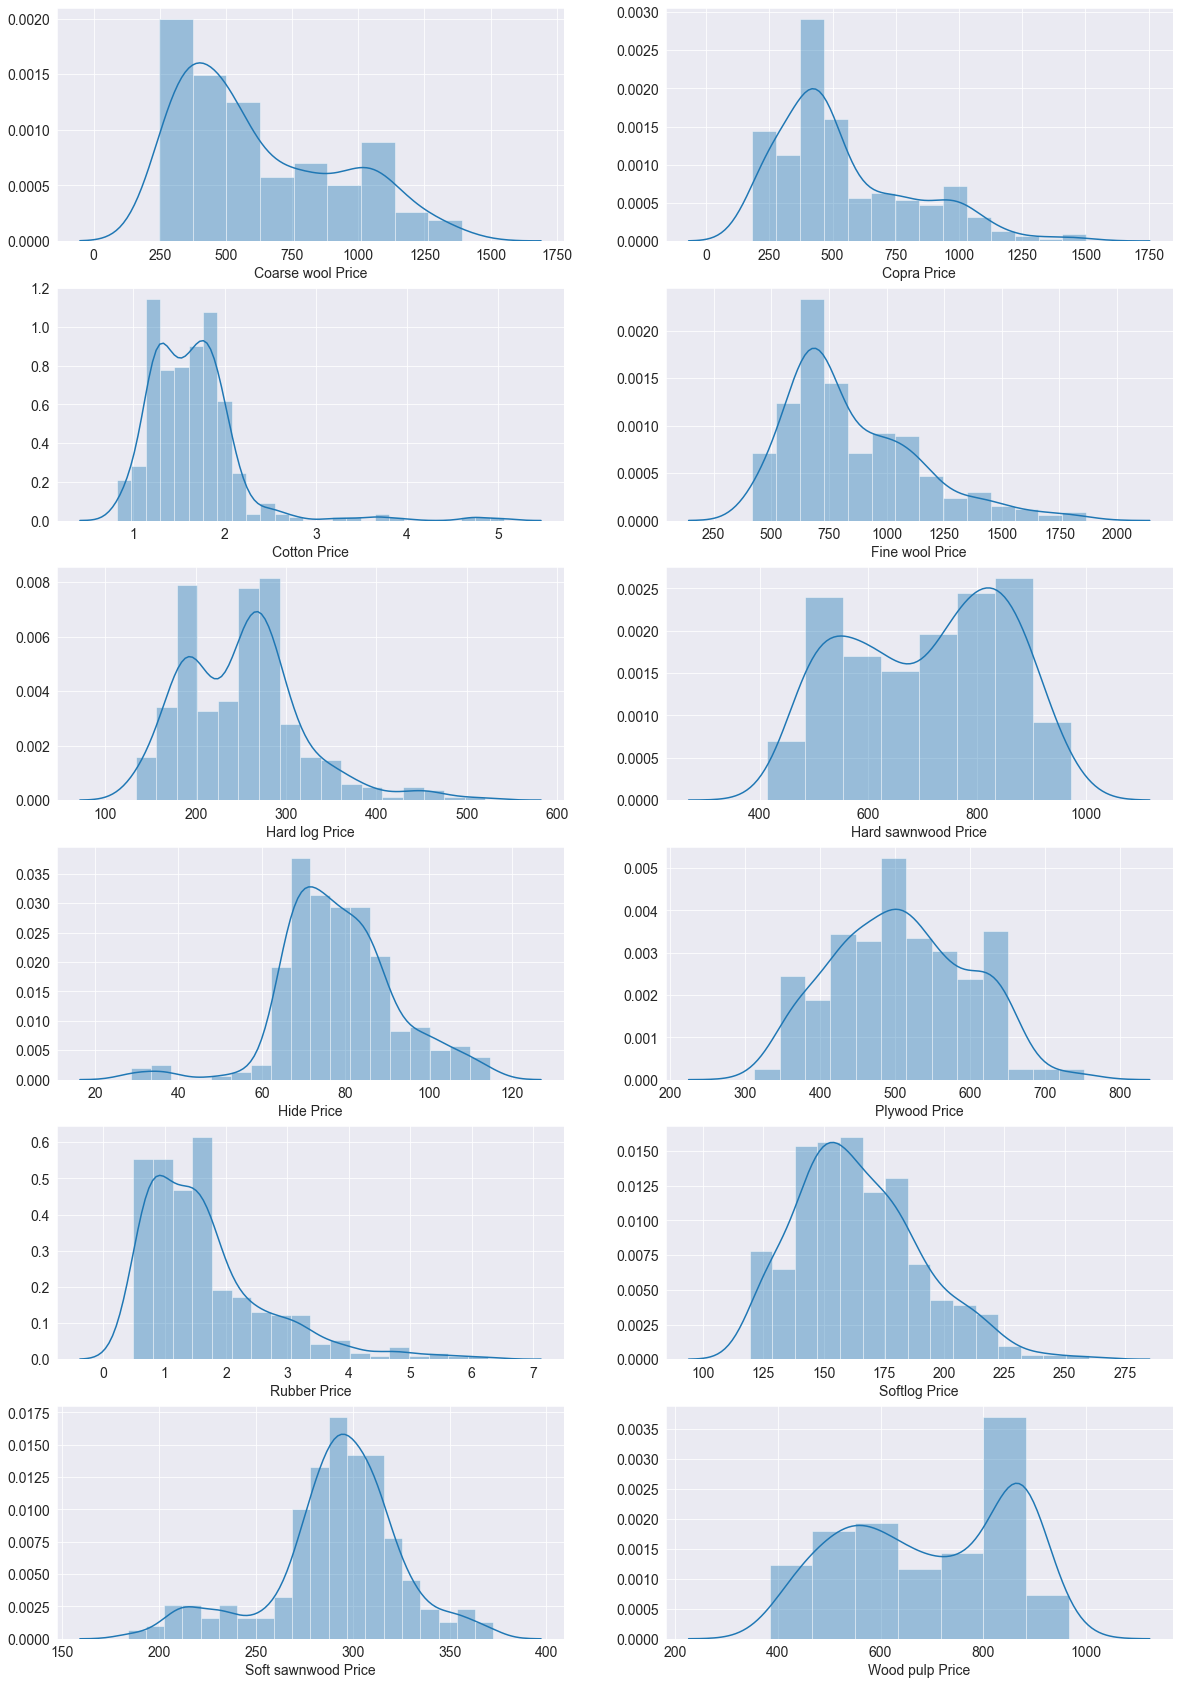

In [36]:
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(20, 30))
Prices_column = ['Coarse wool Price', 'Copra Price','Cotton Price', 'Fine wool Price', 'Hard log Price', 'Hard sawnwood Price',
                 'Hide Price', 'Plywood Price', 'Rubber Price', 'Softlog Price', 'Soft sawnwood Price','Wood pulp Price']
for i, col in enumerate(Prices_column):
    ax = plt.subplot(6, 2, i+1)
    sns.distplot(prices_df[col], ax=ax)

Let's now plot the distribution of all the **%Change**

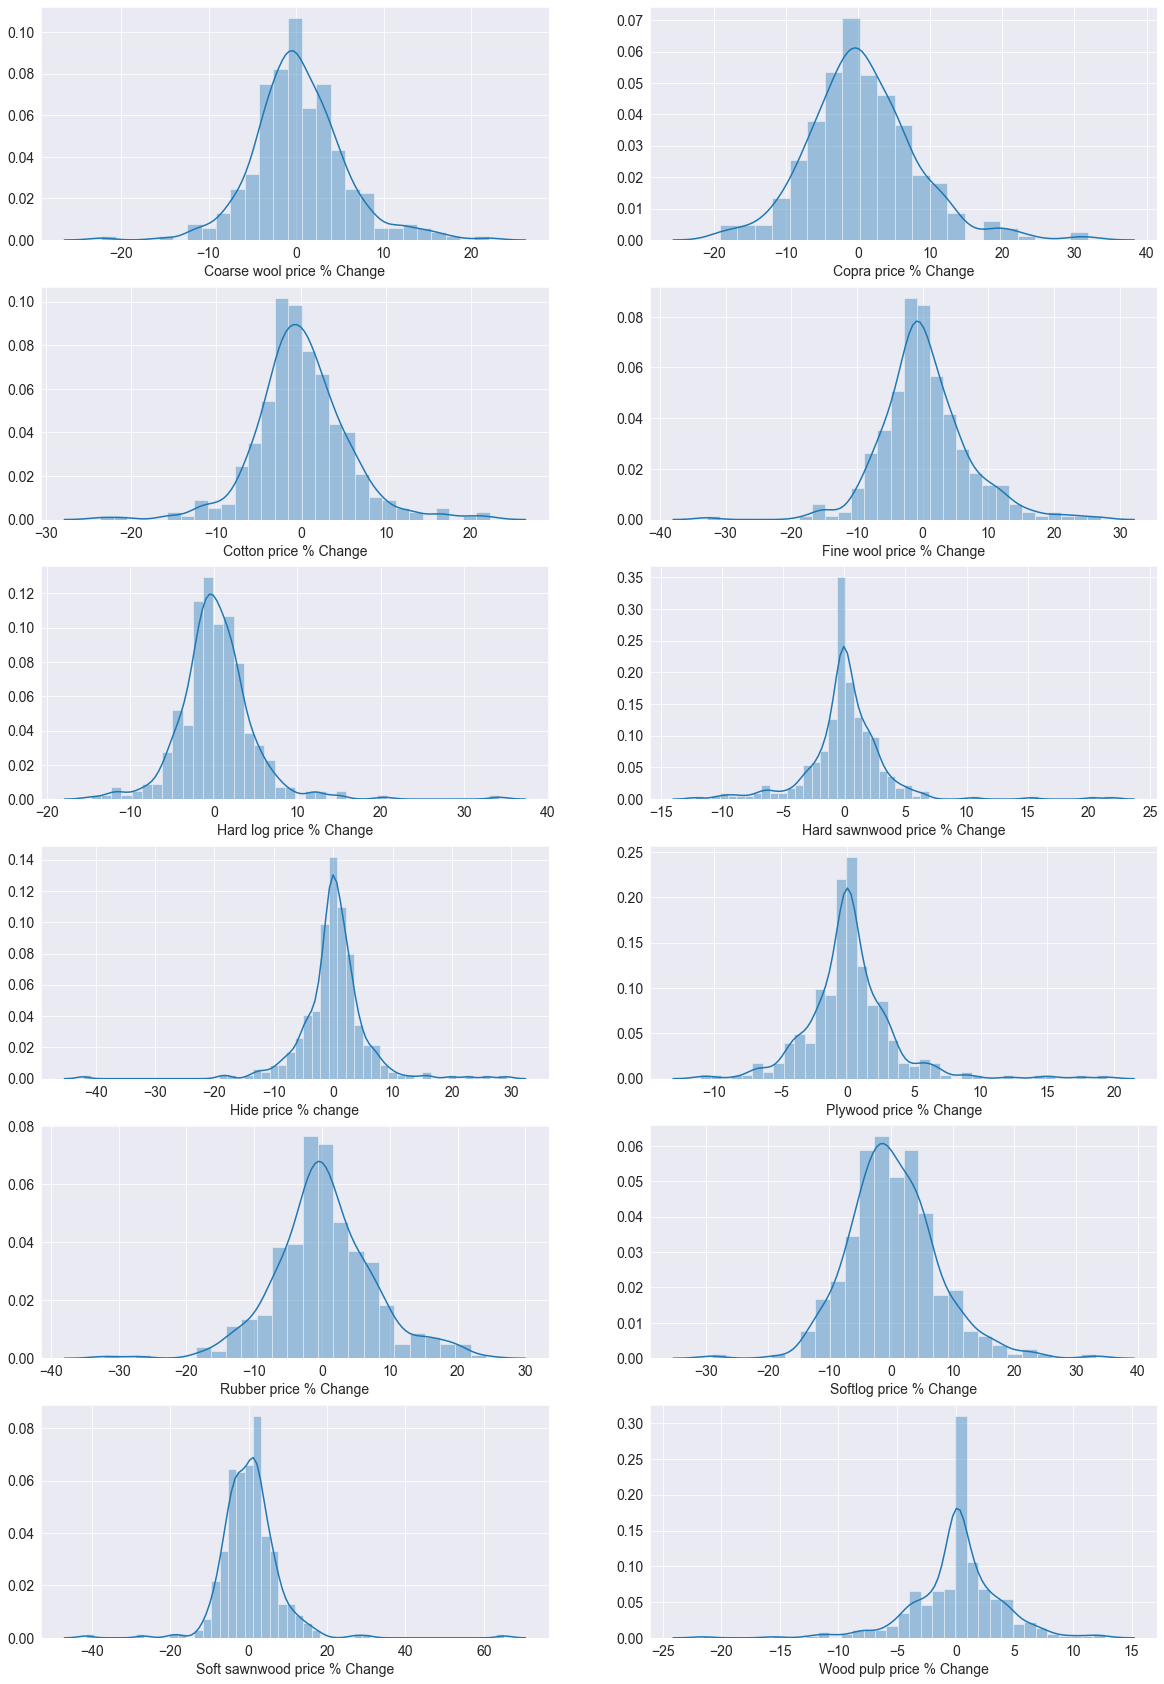

In [37]:
fig, _ = plt.subplots(nrows=6, ncols=2, figsize=(20, 30))
change_column = ['Coarse wool price % Change', 'Copra price % Change','Cotton price % Change', 'Fine wool price % Change','Hard log price % Change', 
                 'Hard sawnwood price % Change','Hide price % change', 'Plywood price % Change', 'Rubber price % Change', 
                 'Softlog price % Change', 'Soft sawnwood price % Change',  'Wood pulp price % Change']
for i, col in enumerate(change_column):
    ax = plt.subplot(6, 2, i+1)
    sns.distplot(prices_df[col], ax=ax)

Now let's do the analysis Material wise:
First is `Coarse Wool`

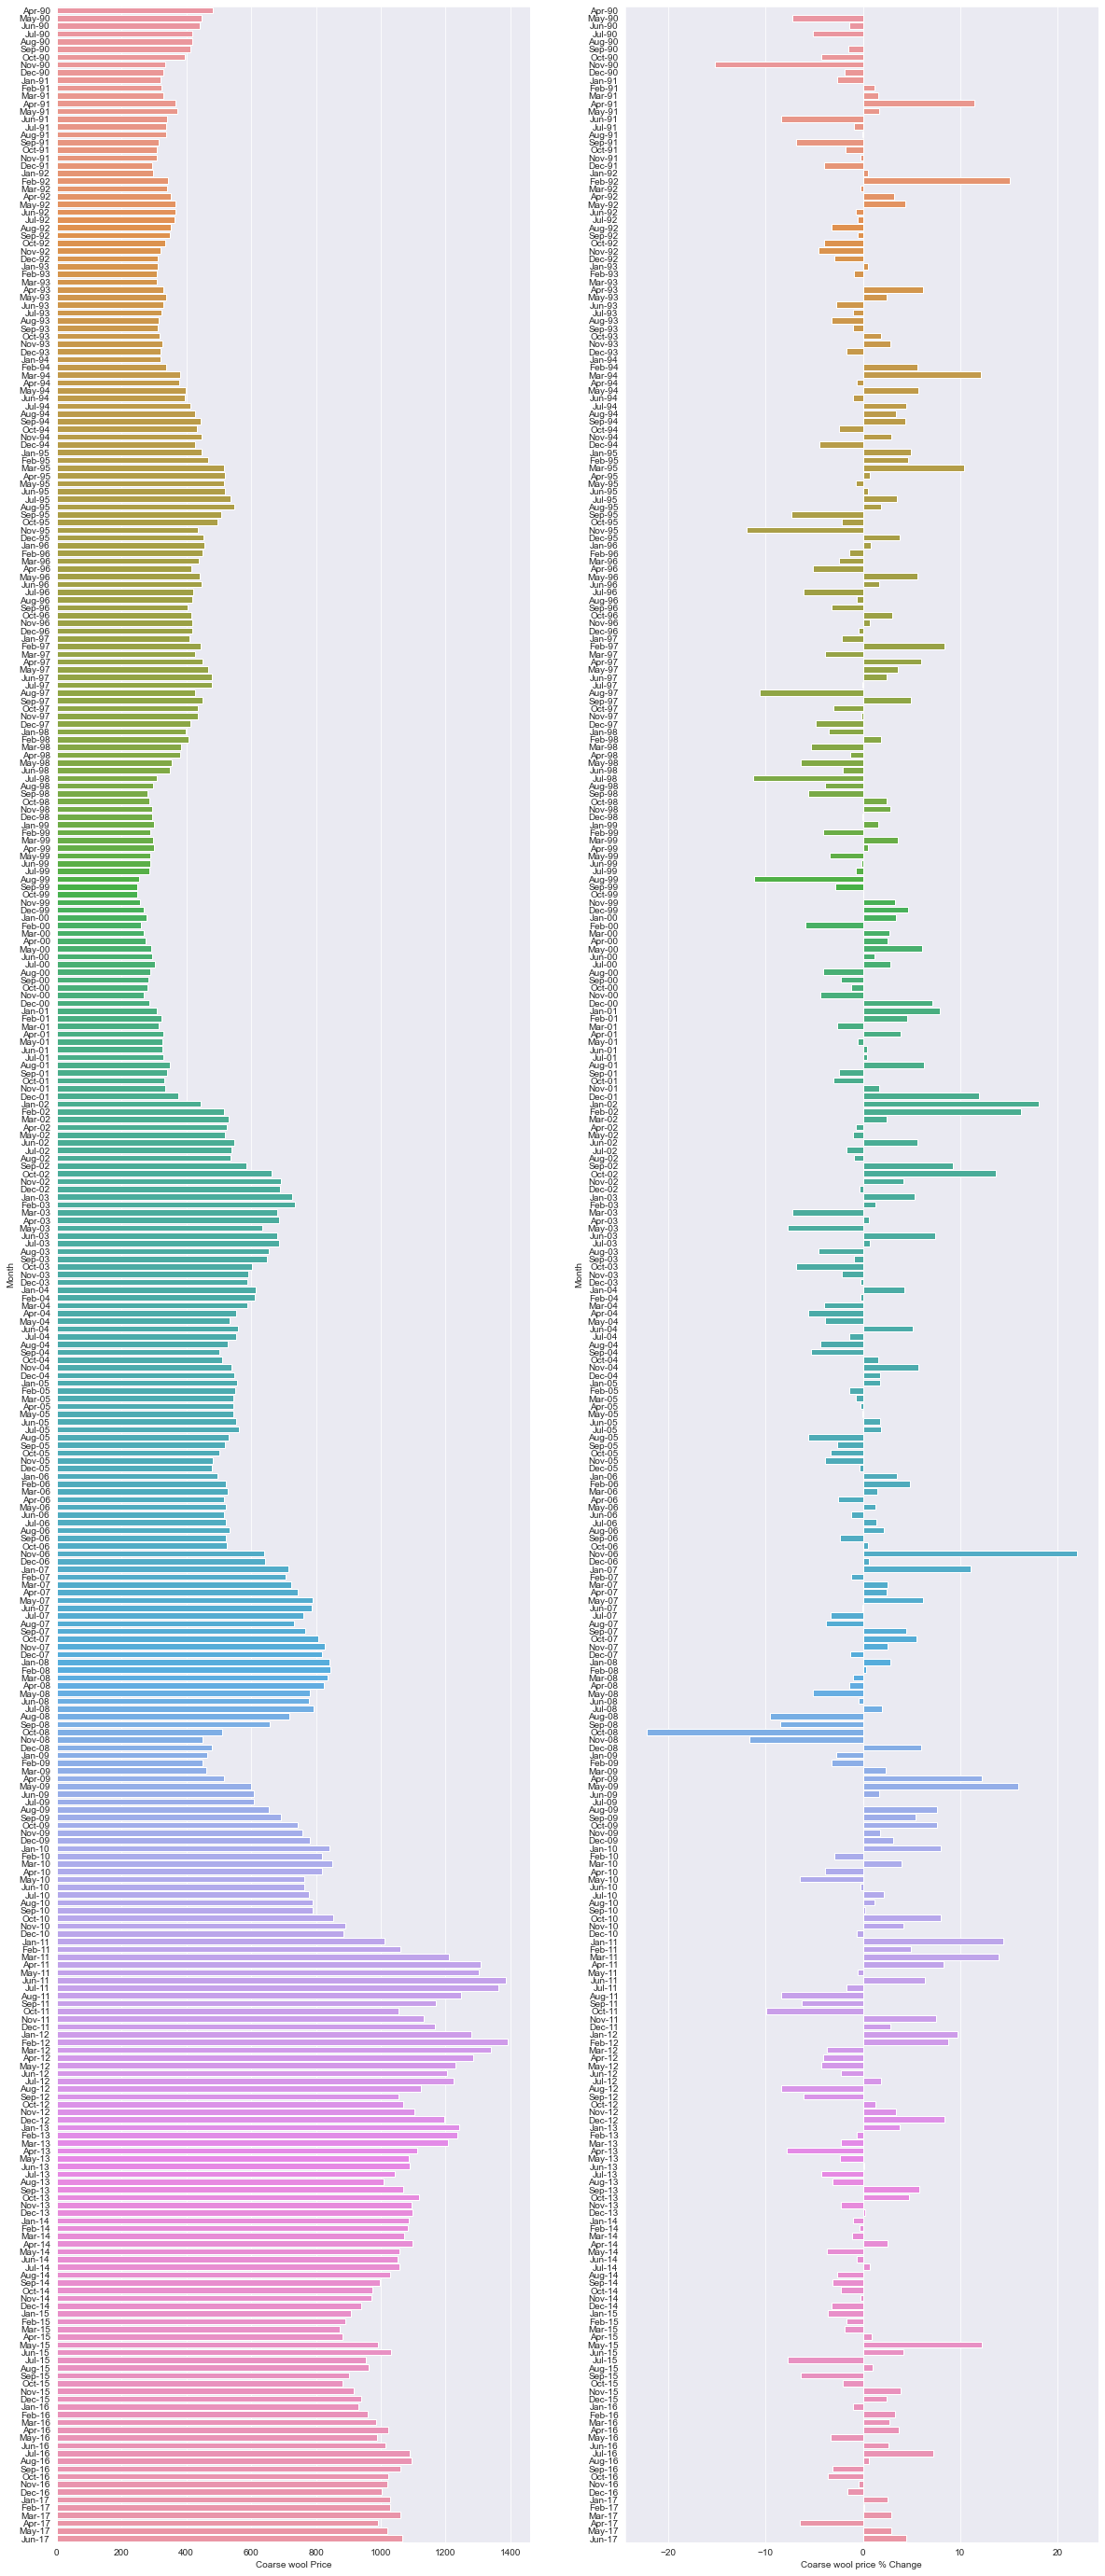

In [72]:
coarse_wool = prices_df[prices_df['Coarse wool Price'].notna()][['Month', 'Coarse wool Price', 'Coarse wool price % Change', 'month_name', 'year']]
matplotlib.rcParams['font.size'] = 10
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 50))
sns.barplot(x='Coarse wool Price', y='Month', data=coarse_wool, orient='h', ax=axes[0])
sns.barplot(x='Coarse wool price % Change', y='Month', data=coarse_wool, orient='h', ax=axes[1])

Text(0.5, 1.0, 'Average Monthly Price')

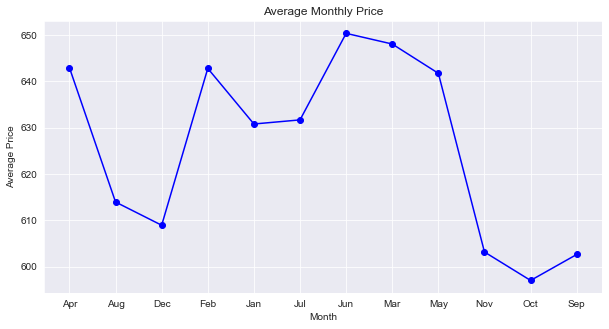

In [85]:
matplotlib.rcParams['figure.figsize'] = (10, 5)
plt.plot(coarse_wool.groupby('month_name').mean(), 'bo-')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.title('Average Monthly Price')

Text(0.5, 1.0, 'Average Yearly Price')

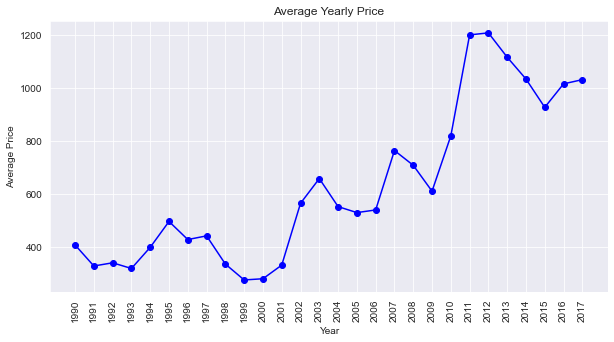

In [76]:
matplotlib.rcParams['figure.figsize'] = (10, 5)
plt.plot(coarse_wool.groupby('year').mean(), 'bo-')
plt.xticks(rotation='vertical')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.title('Average Yearly Price')

Now Analysis on `Copra`

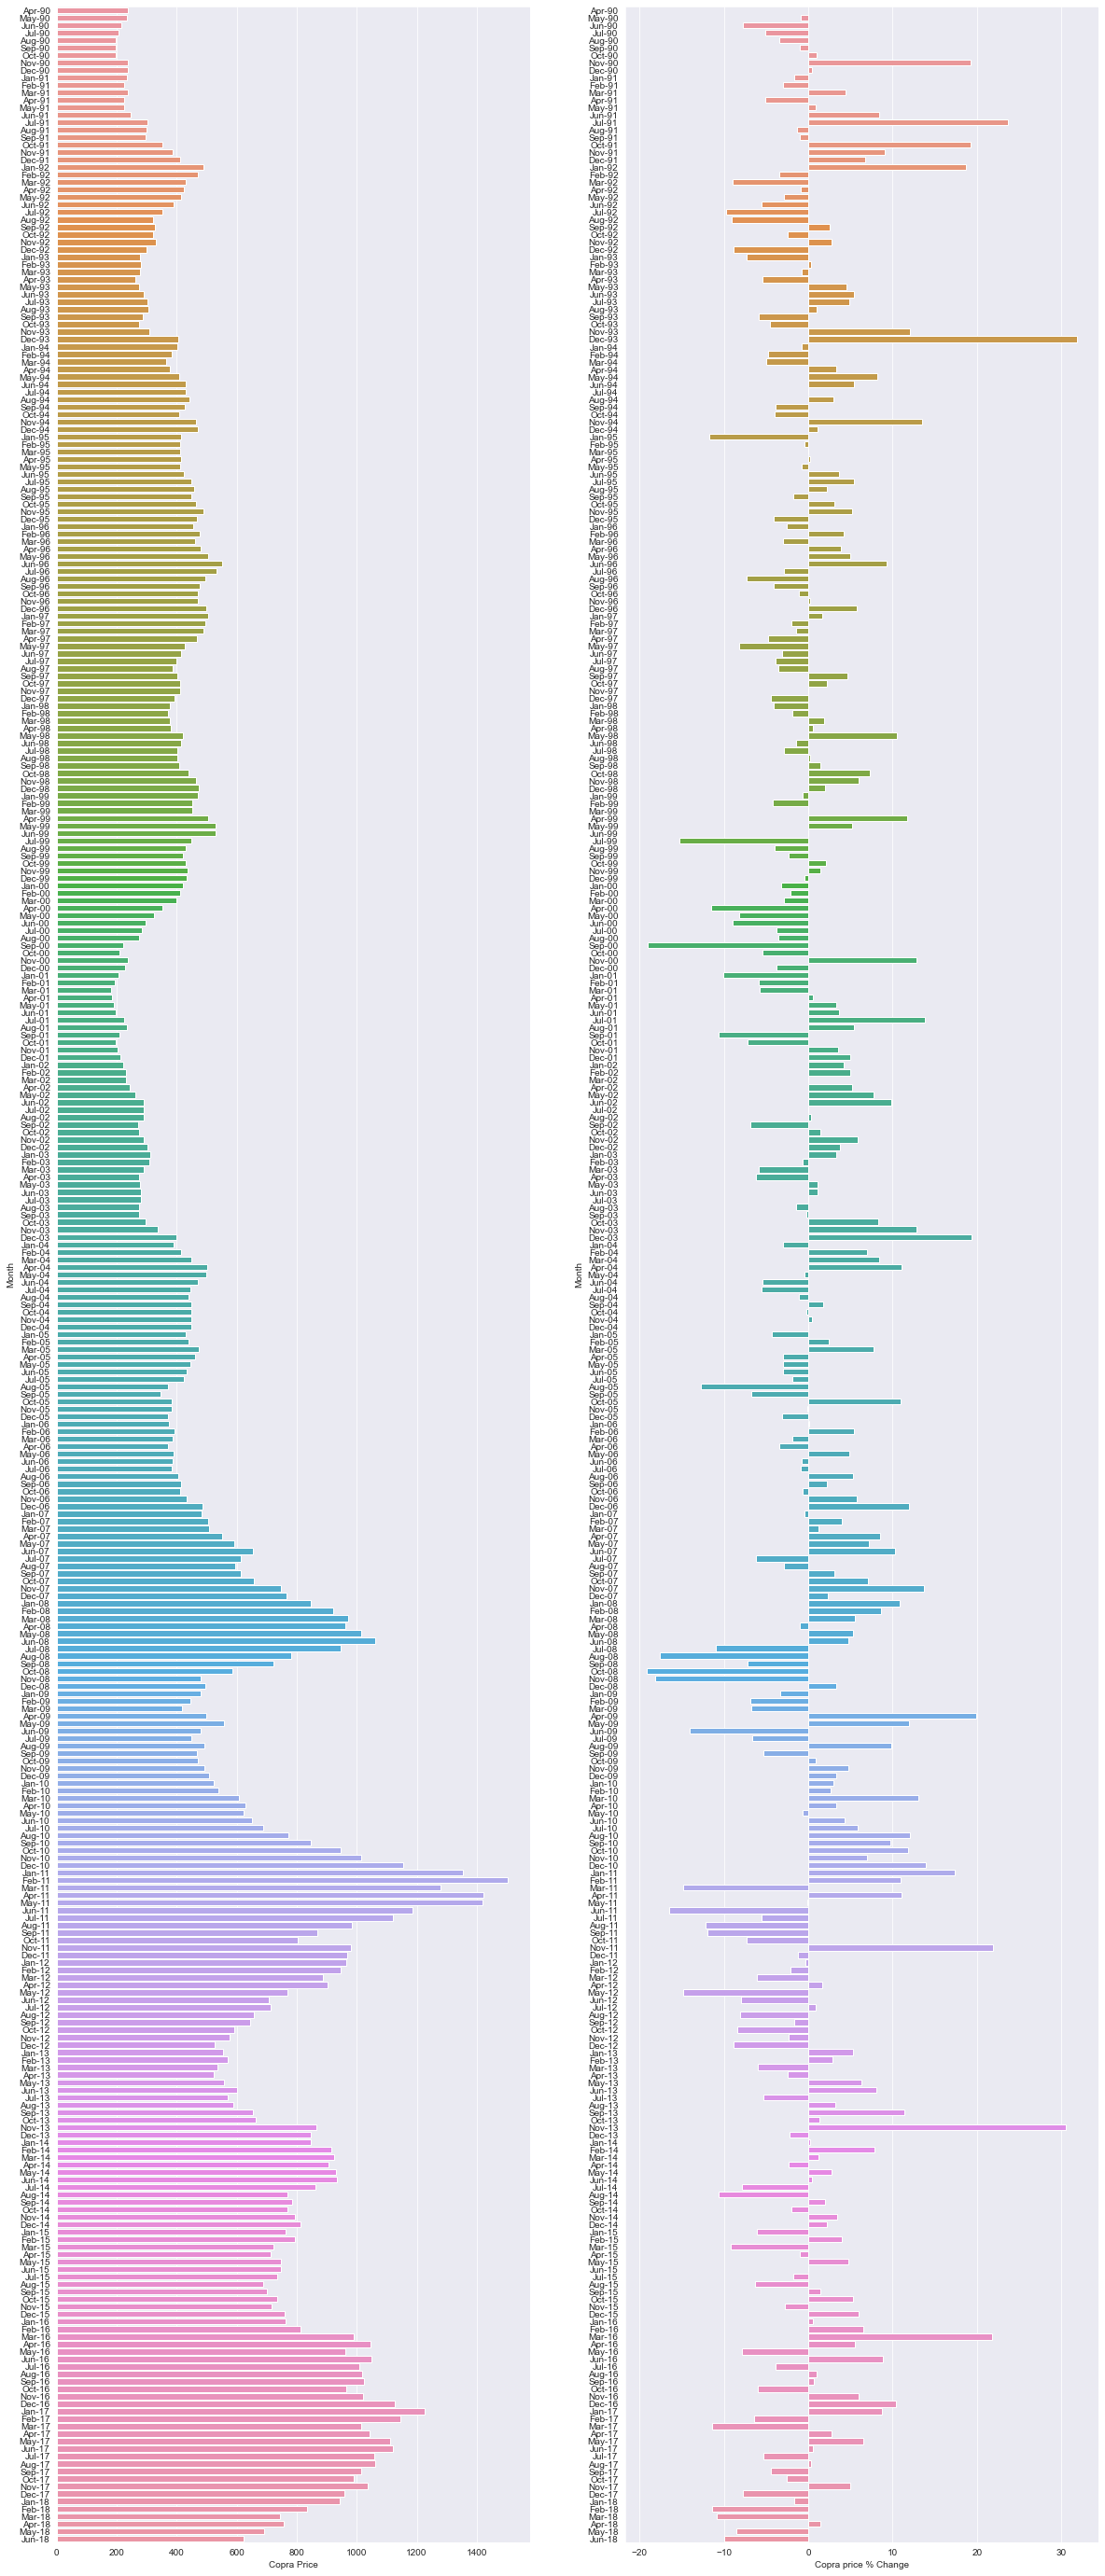

In [79]:
copra = prices_df[prices_df['Copra Price'].notna()][['Month', 'Copra Price', 'Copra price % Change', 'month_name', 'year']]

matplotlib.rcParams['font.size'] = 10
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 50))
sns.barplot(x='Copra Price', y='Month', data=copra, orient='h', ax=axes[0])
sns.barplot(x='Copra price % Change', y='Month', data=copra, orient='h', ax=axes[1])

Text(0.5, 1.0, 'Average Monthly Price')

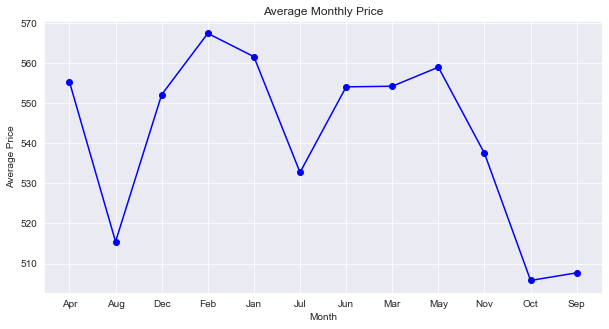

In [80]:
matplotlib.rcParams['figure.figsize'] = (10, 5)
plt.plot(copra.groupby('month_name').mean(), 'bo-')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.title('Average Monthly Price')

Text(0.5, 1.0, 'Average Yearly Price')

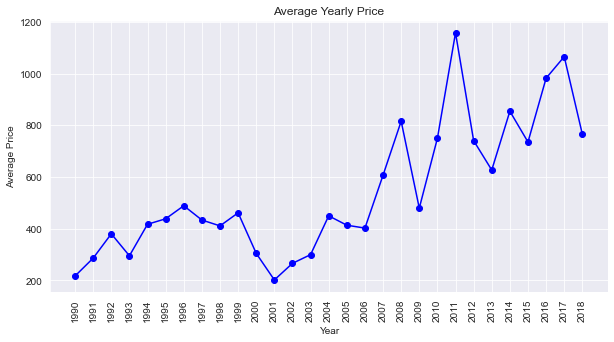

In [81]:
matplotlib.rcParams['figure.figsize'] = (10, 5)
plt.plot(copra.groupby('year').mean(), 'bo-')
plt.xticks(rotation='vertical')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.title('Average Yearly Price')

Now Let's see for `Cotton`

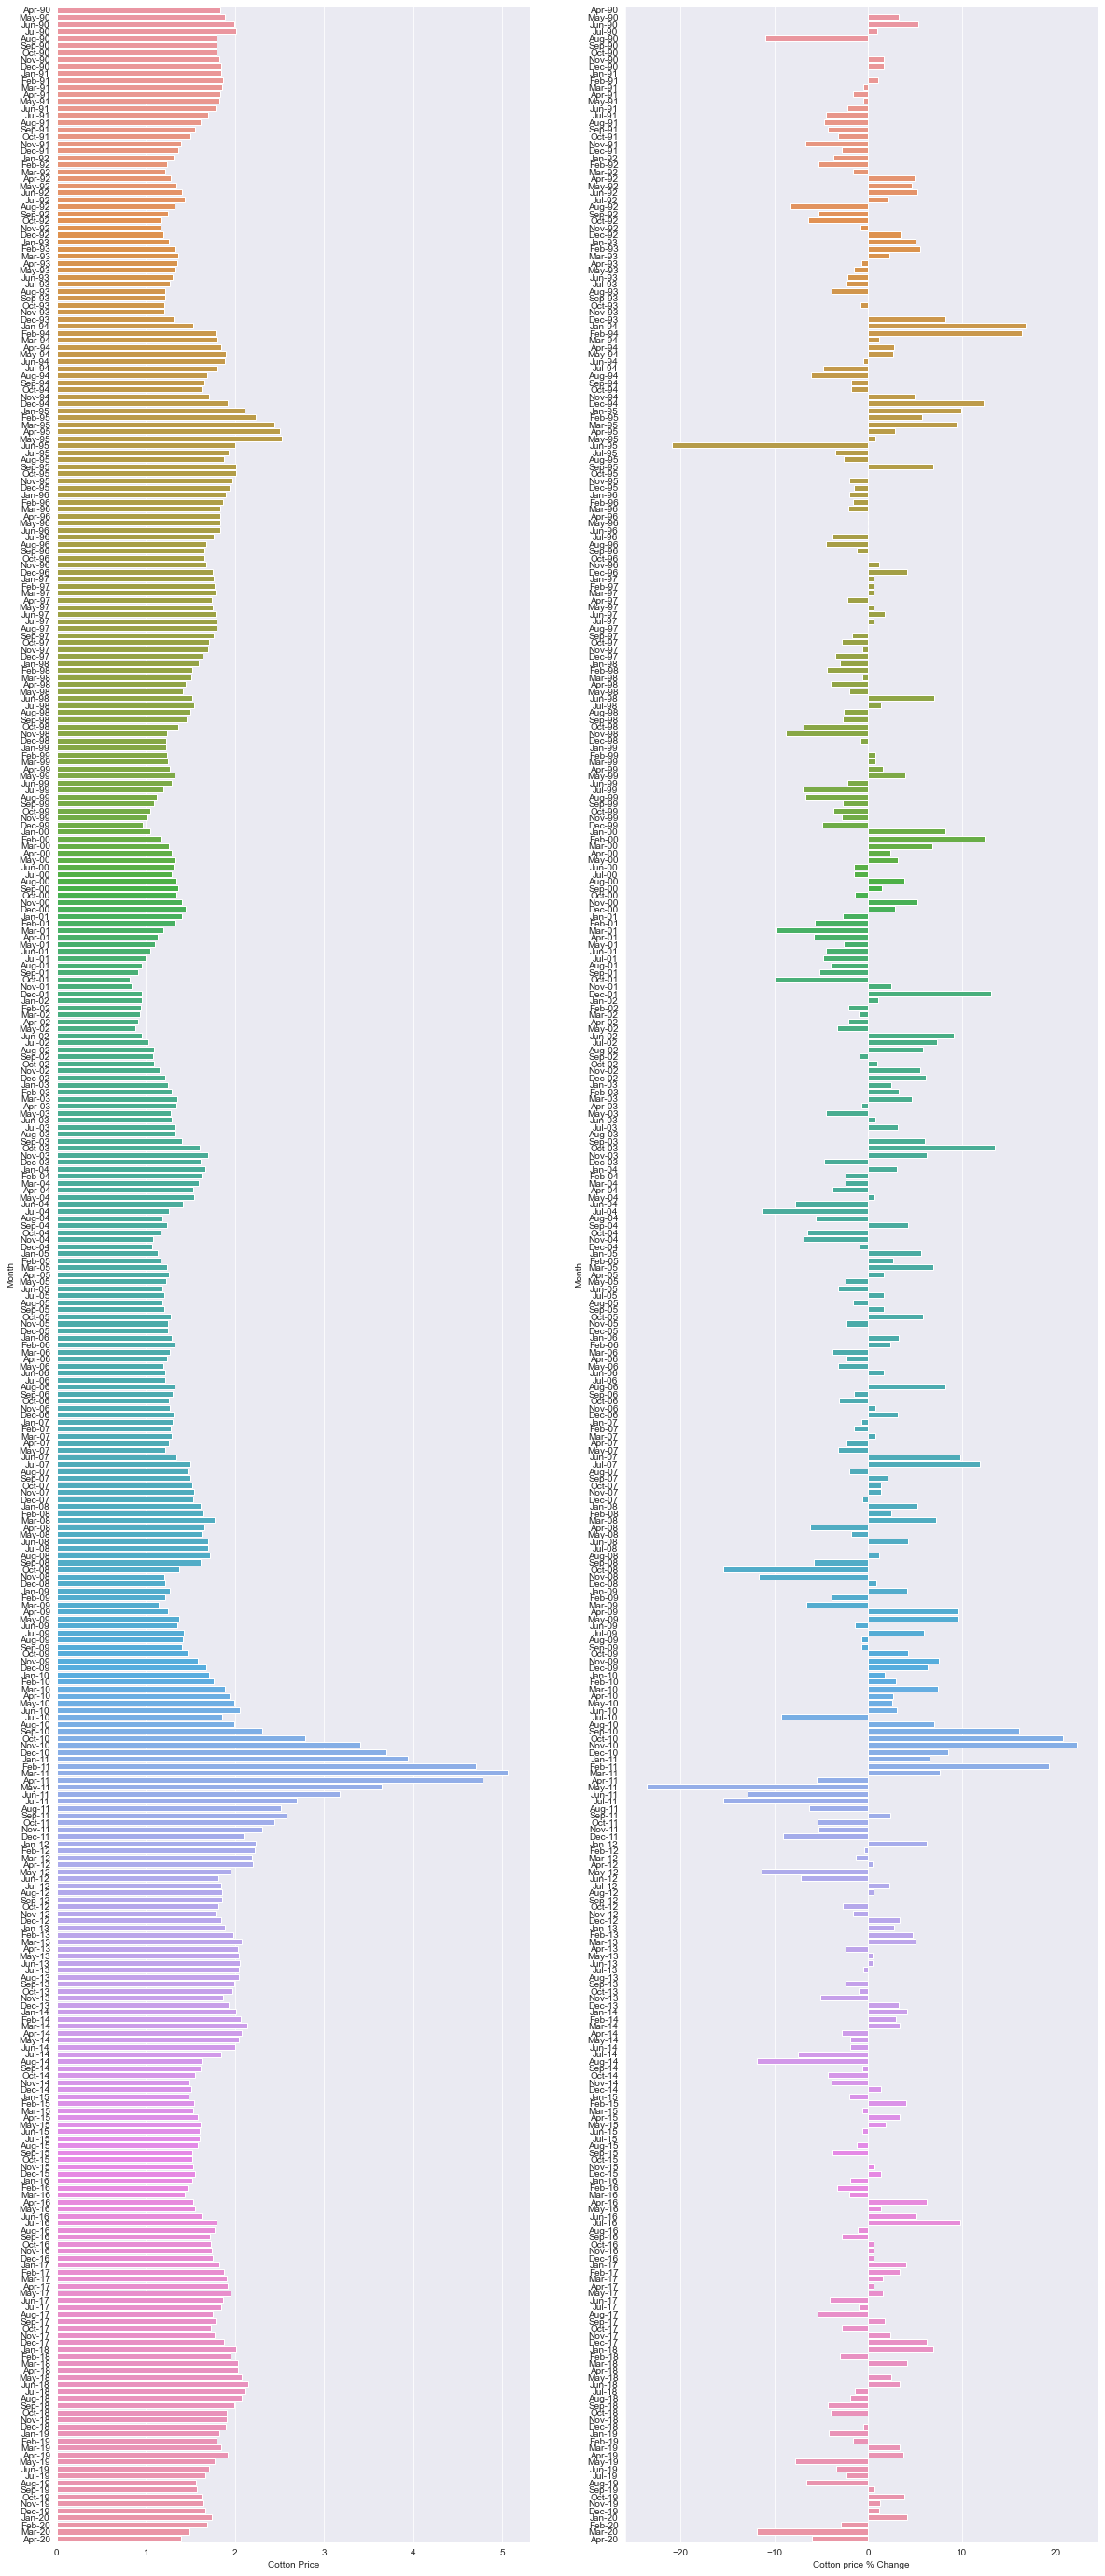

In [86]:
cotton = prices_df[prices_df['Cotton Price'].notna()][['Month', 'Cotton Price', 'Cotton price % Change', 'month_name', 'year']]

matplotlib.rcParams['font.size'] = 10
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 50))
sns.barplot(x='Cotton Price', y='Month', data=cotton, orient='h', ax=axes[0])
sns.barplot(x='Cotton price % Change', y='Month', data=cotton, orient='h', ax=axes[1])

Text(0.5, 1.0, 'Average Monthly Price')

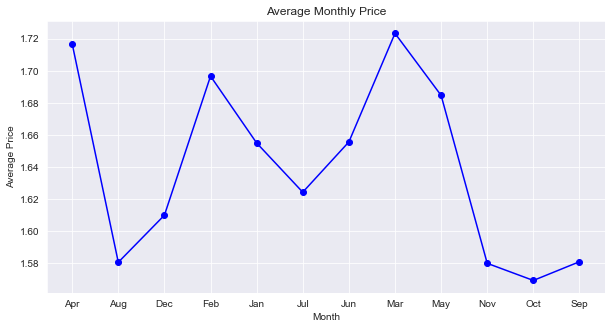

In [87]:
matplotlib.rcParams['figure.figsize'] = (10, 5)
plt.plot(cotton.groupby('month_name').mean(), 'bo-')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.title('Average Monthly Price')

Text(0.5, 1.0, 'Average Yearly Price')

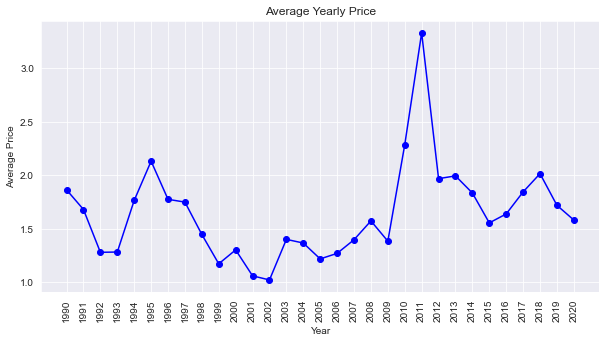

In [88]:
matplotlib.rcParams['figure.figsize'] = (10, 5)
plt.plot(cotton.groupby('year').mean(), 'bo-')
plt.xticks(rotation='vertical')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.title('Average Yearly Price')

Next is `Fine wool`

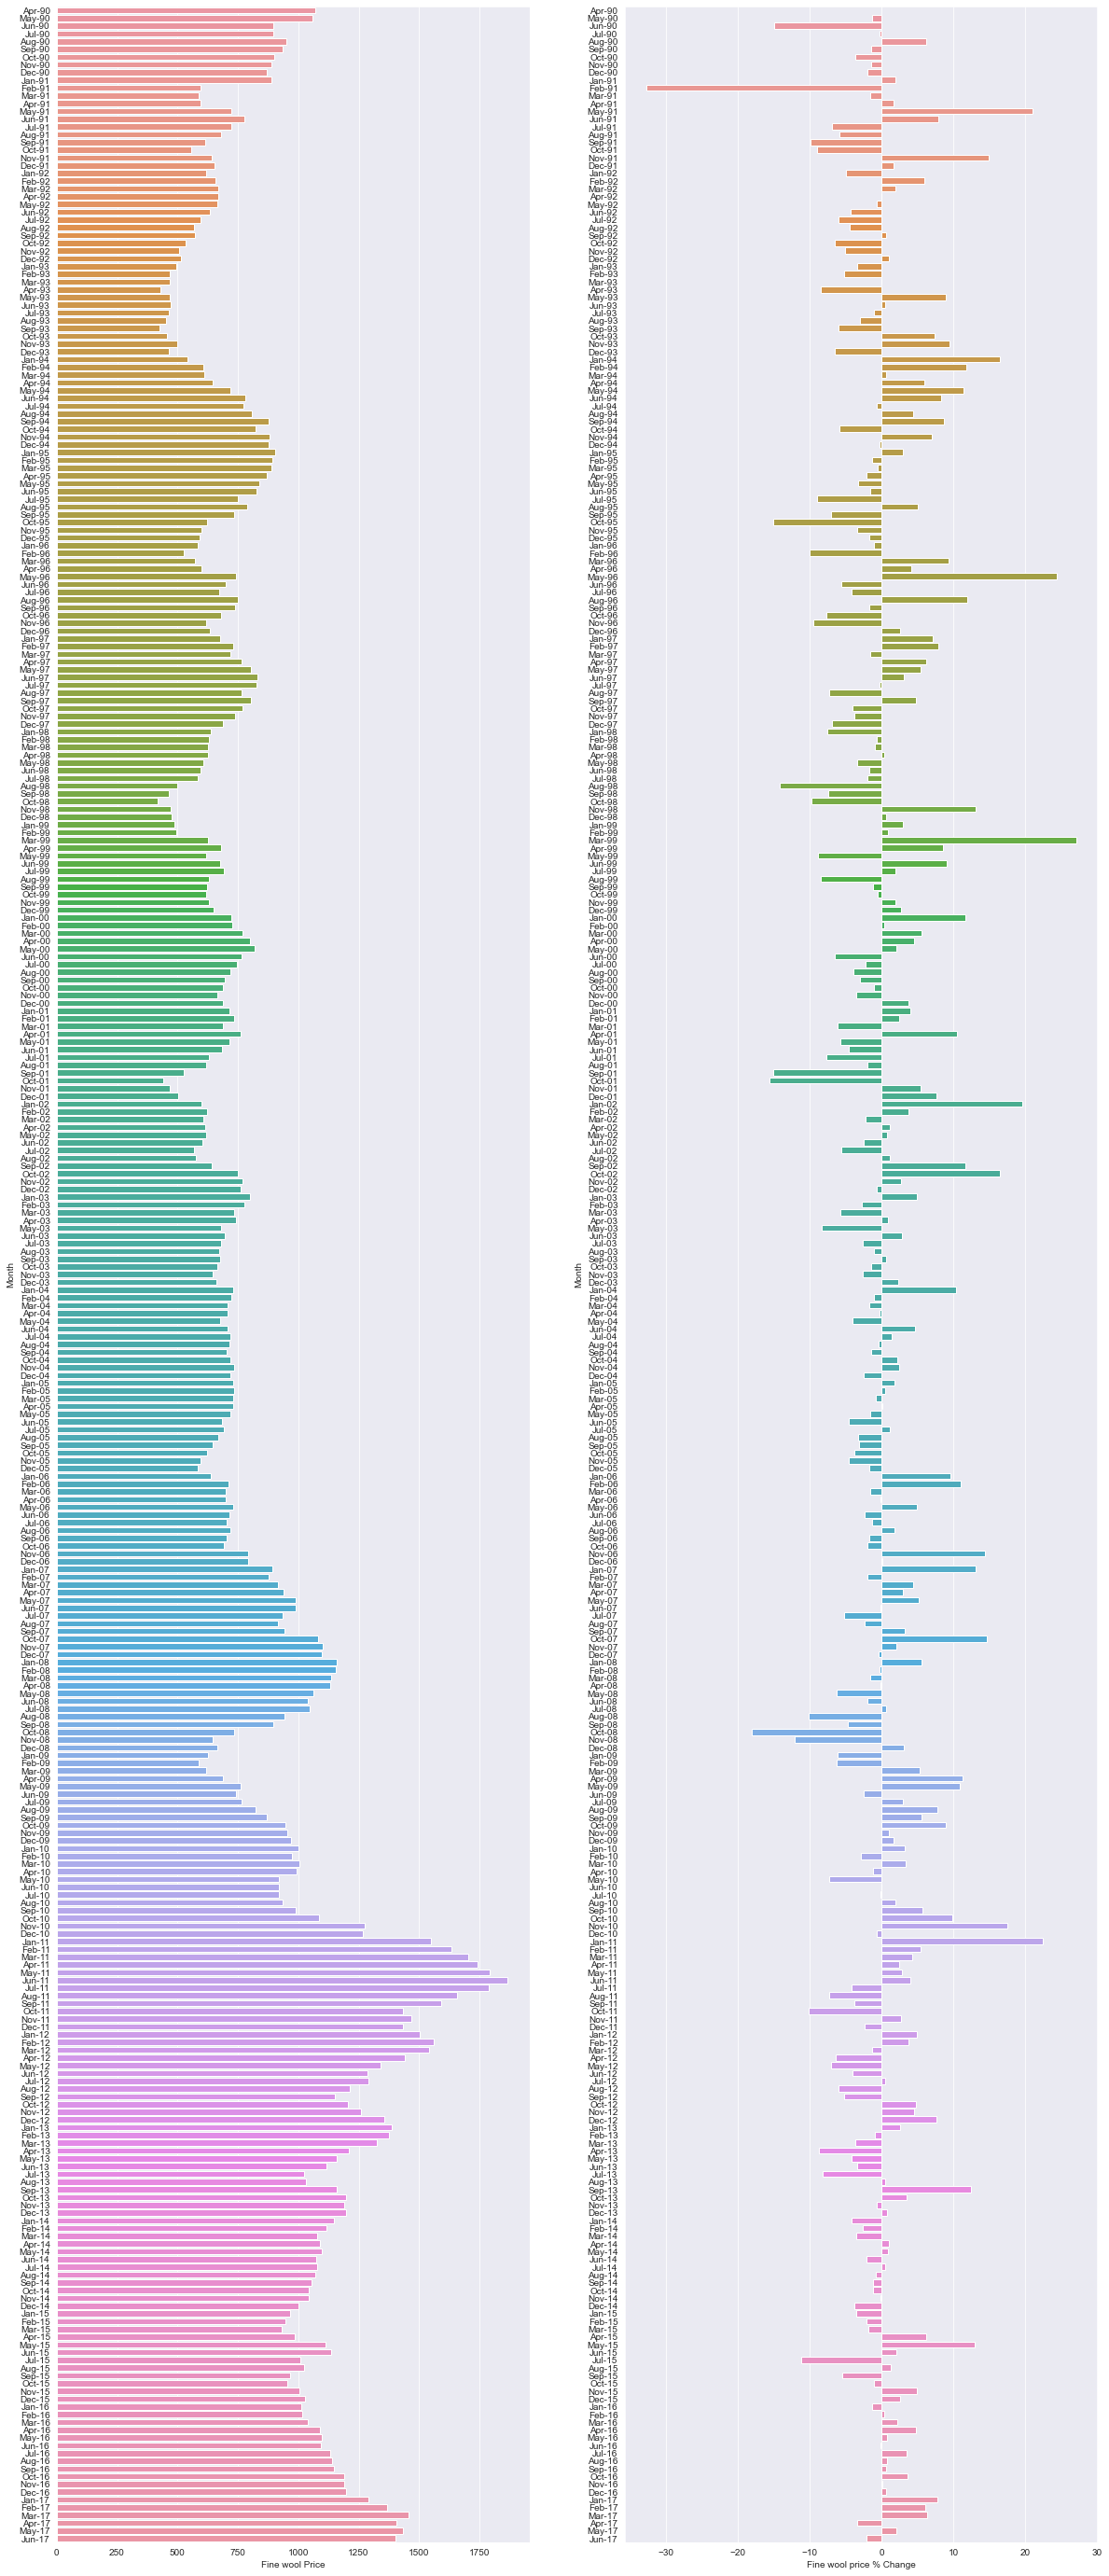

In [89]:
fine_wool = prices_df[prices_df['Fine wool Price'].notna()][['Month', 'Fine wool Price', 'Fine wool price % Change', 'month_name', 'year']]

matplotlib.rcParams['font.size'] = 10
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 50))
sns.barplot(x='Fine wool Price', y='Month', data=fine_wool, orient='h', ax=axes[0])
sns.barplot(x='Fine wool price % Change', y='Month', data=fine_wool, orient='h', ax=axes[1])

Text(0.5, 1.0, 'Average Monthly Price')

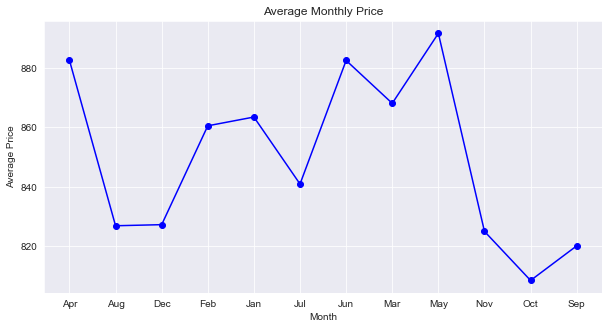

In [90]:
matplotlib.rcParams['figure.figsize'] = (10, 5)
plt.plot(fine_wool.groupby('month_name').mean(), 'bo-')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.title('Average Monthly Price')

Text(0.5, 1.0, 'Average Yearly Price')

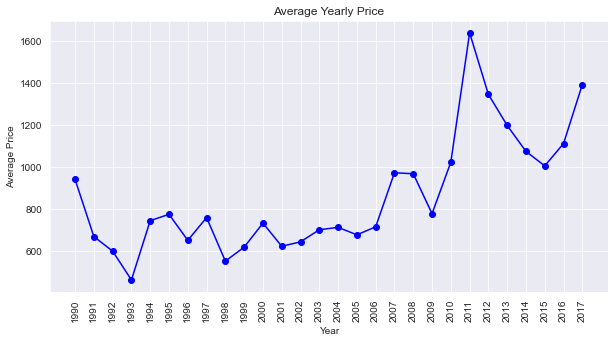

In [91]:
matplotlib.rcParams['figure.figsize'] = (10, 5)
plt.plot(fine_wool.groupby('year').mean(), 'bo-')
plt.xticks(rotation='vertical')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.title('Average Yearly Price')

Next is `Hard log`

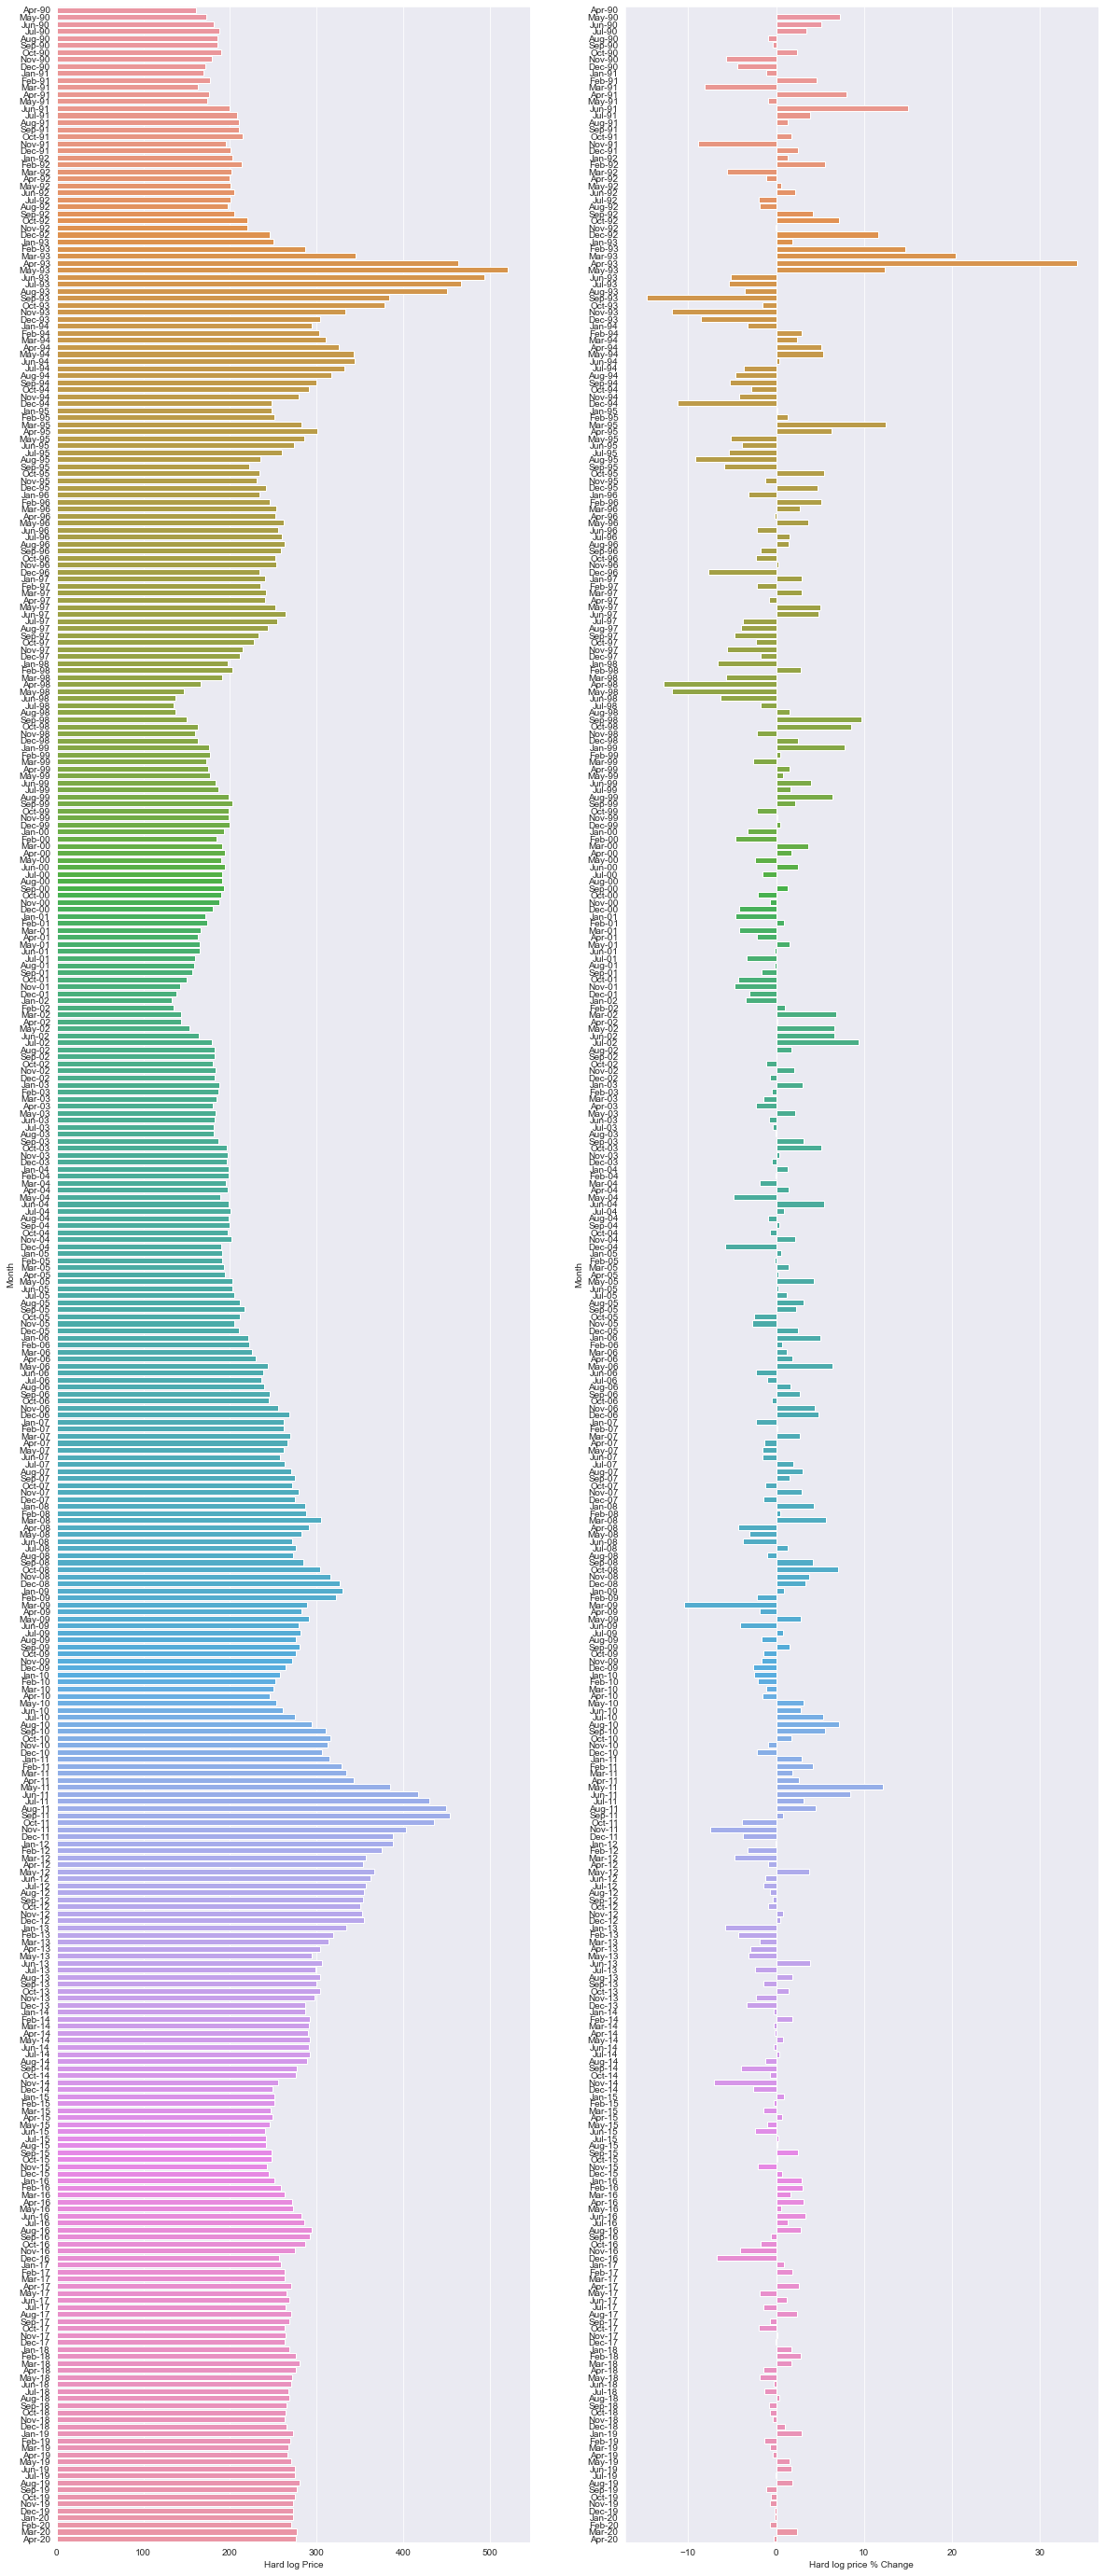

In [95]:
hard_wood = prices_df[prices_df['Hard log Price'].notna()][['Month', 'Hard log Price', 'Hard log price % Change', 'month_name', 'year']]

matplotlib.rcParams['font.size'] = 10
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 50))
sns.barplot(x='Hard log Price', y='Month', data=hard_wood, orient='h', ax=axes[0])
sns.barplot(x='Hard log price % Change', y='Month', data=hard_wood, orient='h', ax=axes[1])

Text(0.5, 1.0, 'Average Monthly Price')

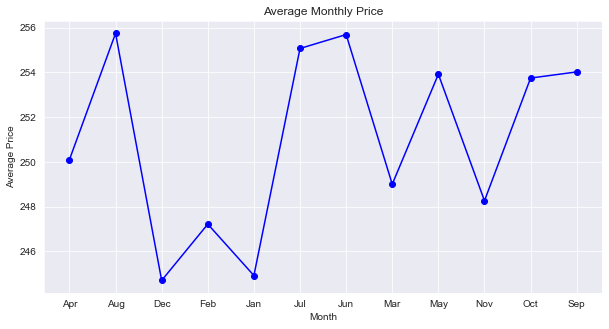

In [96]:
matplotlib.rcParams['figure.figsize'] = (10, 5)
plt.plot(hard_wood.groupby('month_name').mean(), 'bo-')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.title('Average Monthly Price')

Text(0.5, 1.0, 'Average Yearly Price')

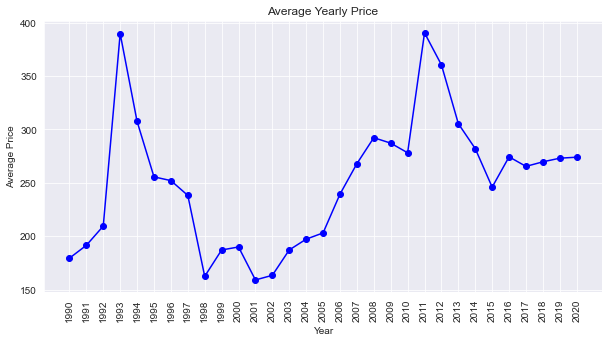

In [97]:
matplotlib.rcParams['figure.figsize'] = (10, 5)
plt.plot(hard_wood.groupby('year').mean(), 'bo-')
plt.xticks(rotation='vertical')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.title('Average Yearly Price')

Next is `Hard sawnwood`

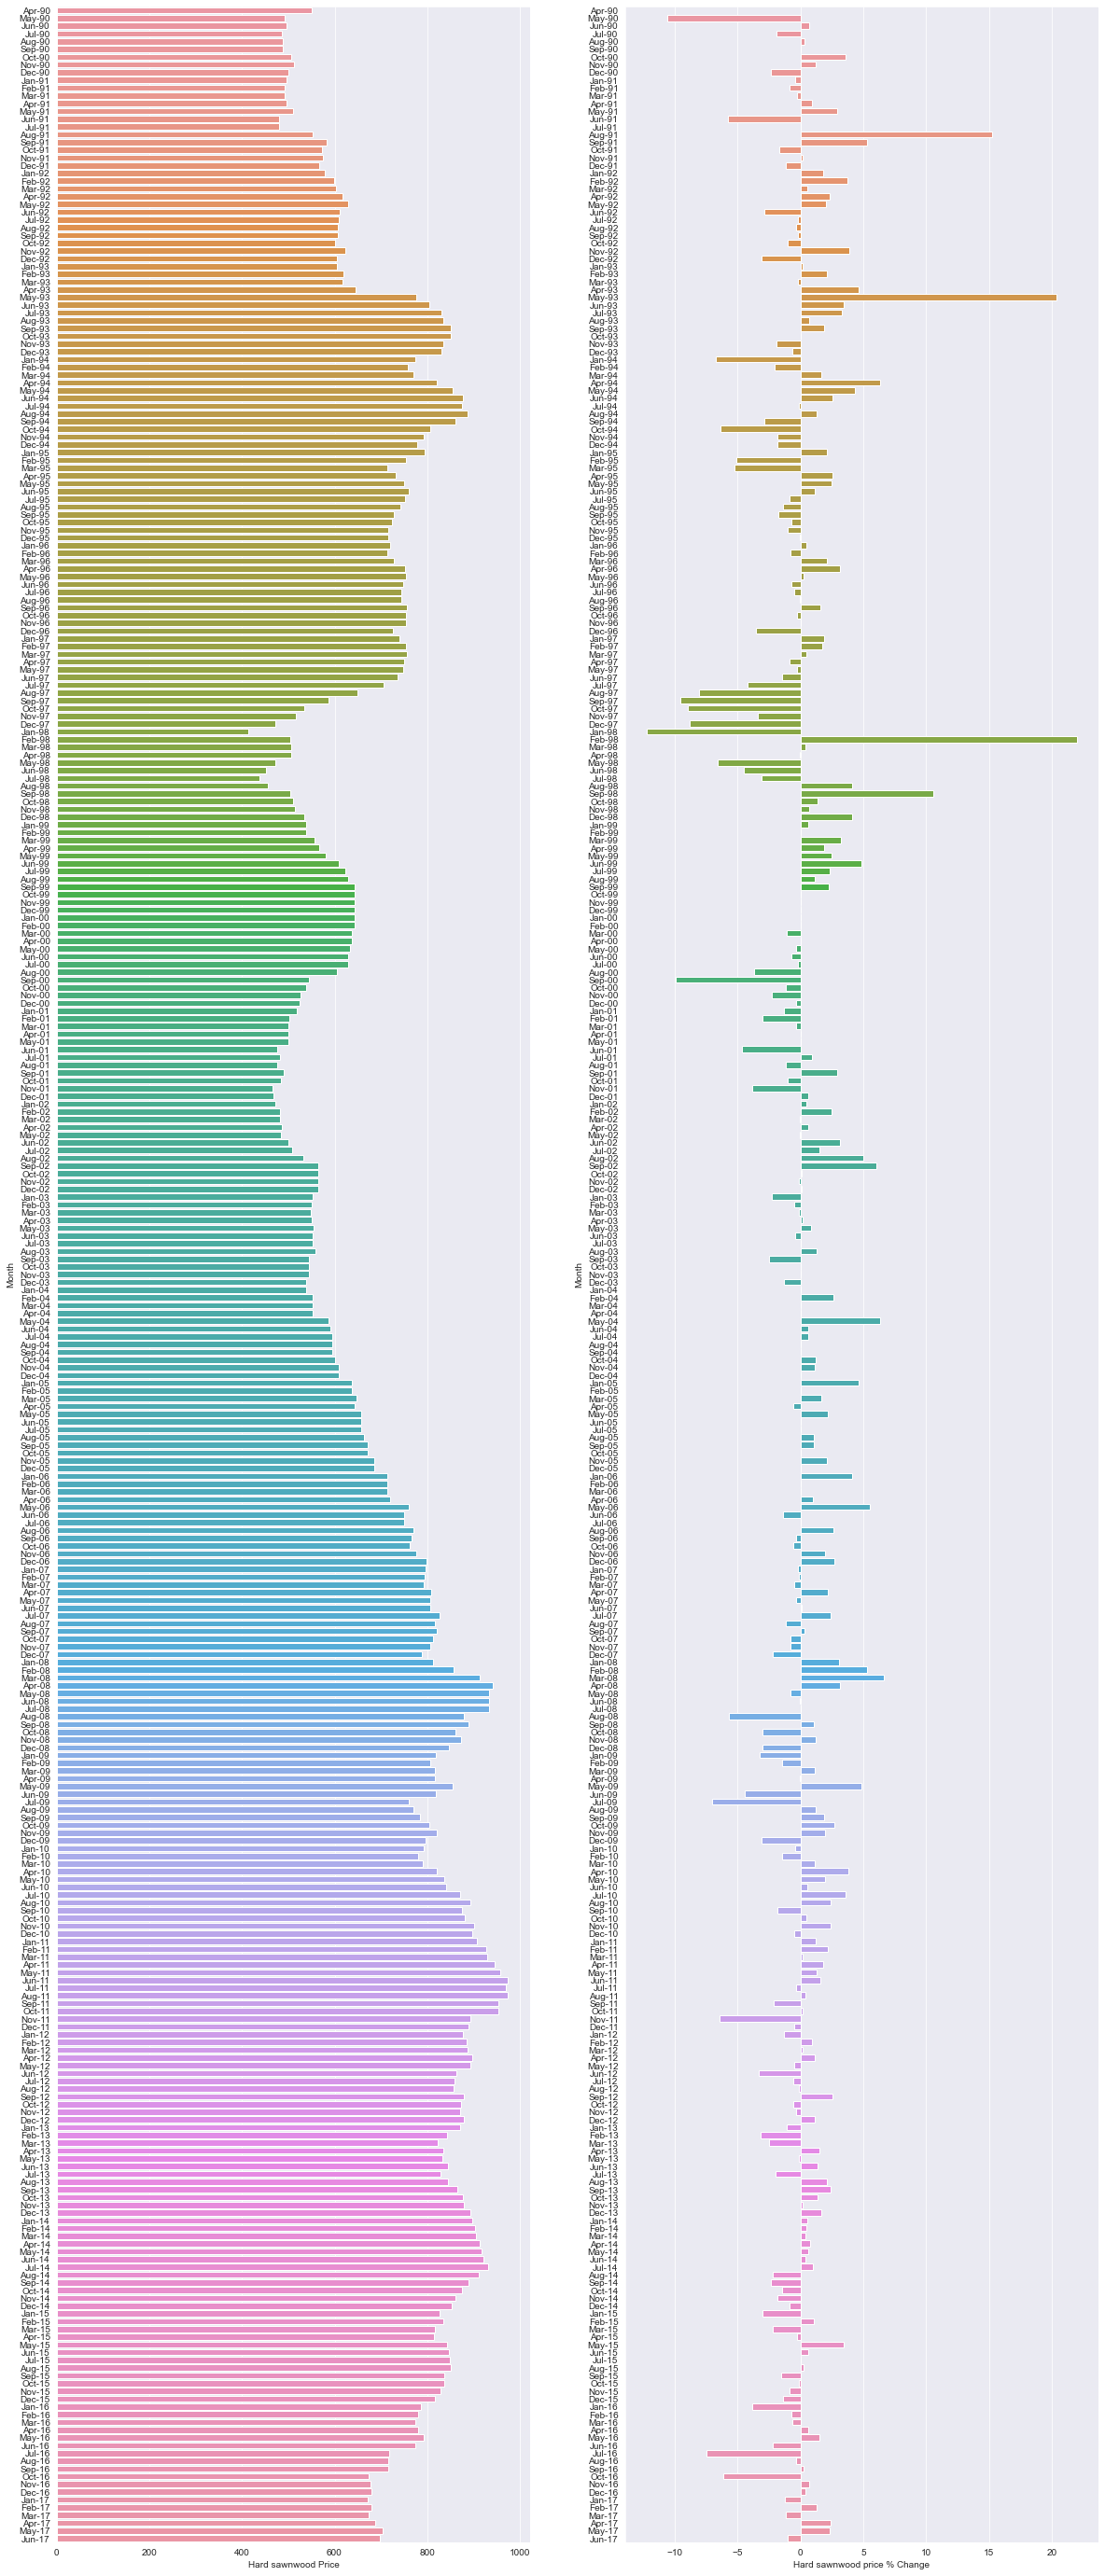

In [98]:
hard_sawnwood = prices_df[prices_df['Hard sawnwood Price'].notna()][['Month', 'Hard sawnwood Price', 'Hard sawnwood price % Change', 'month_name', 'year']]

matplotlib.rcParams['font.size'] = 10
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 50))
sns.barplot(x='Hard sawnwood Price', y='Month', data=hard_sawnwood, orient='h', ax=axes[0])
sns.barplot(x='Hard sawnwood price % Change', y='Month', data=hard_sawnwood, orient='h', ax=axes[1])

Text(0.5, 1.0, 'Average Monthly Price')

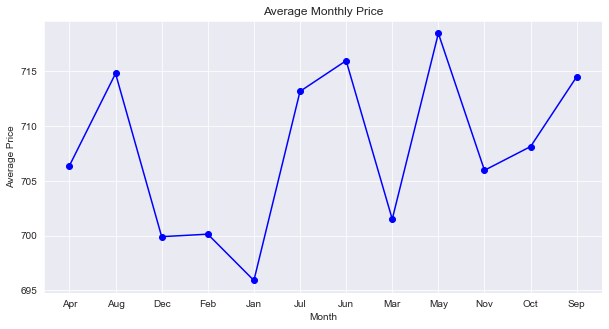

In [99]:
matplotlib.rcParams['figure.figsize'] = (10, 5)
plt.plot(hard_sawnwood.groupby('month_name').mean(), 'bo-')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.title('Average Monthly Price')

Text(0.5, 1.0, 'Average Yearly Price')

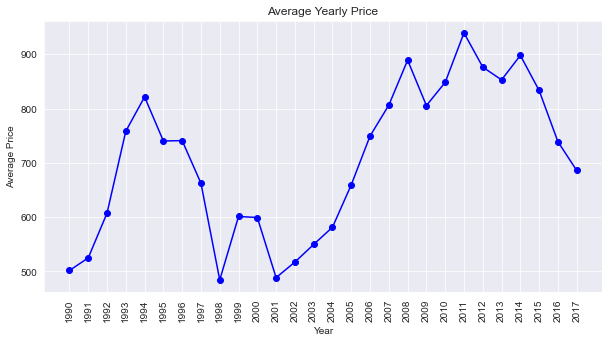

In [100]:
matplotlib.rcParams['figure.figsize'] = (10, 5)
plt.plot(hard_sawnwood.groupby('year').mean(), 'bo-')
plt.xticks(rotation='vertical')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.title('Average Yearly Price')

Next is `Hide`

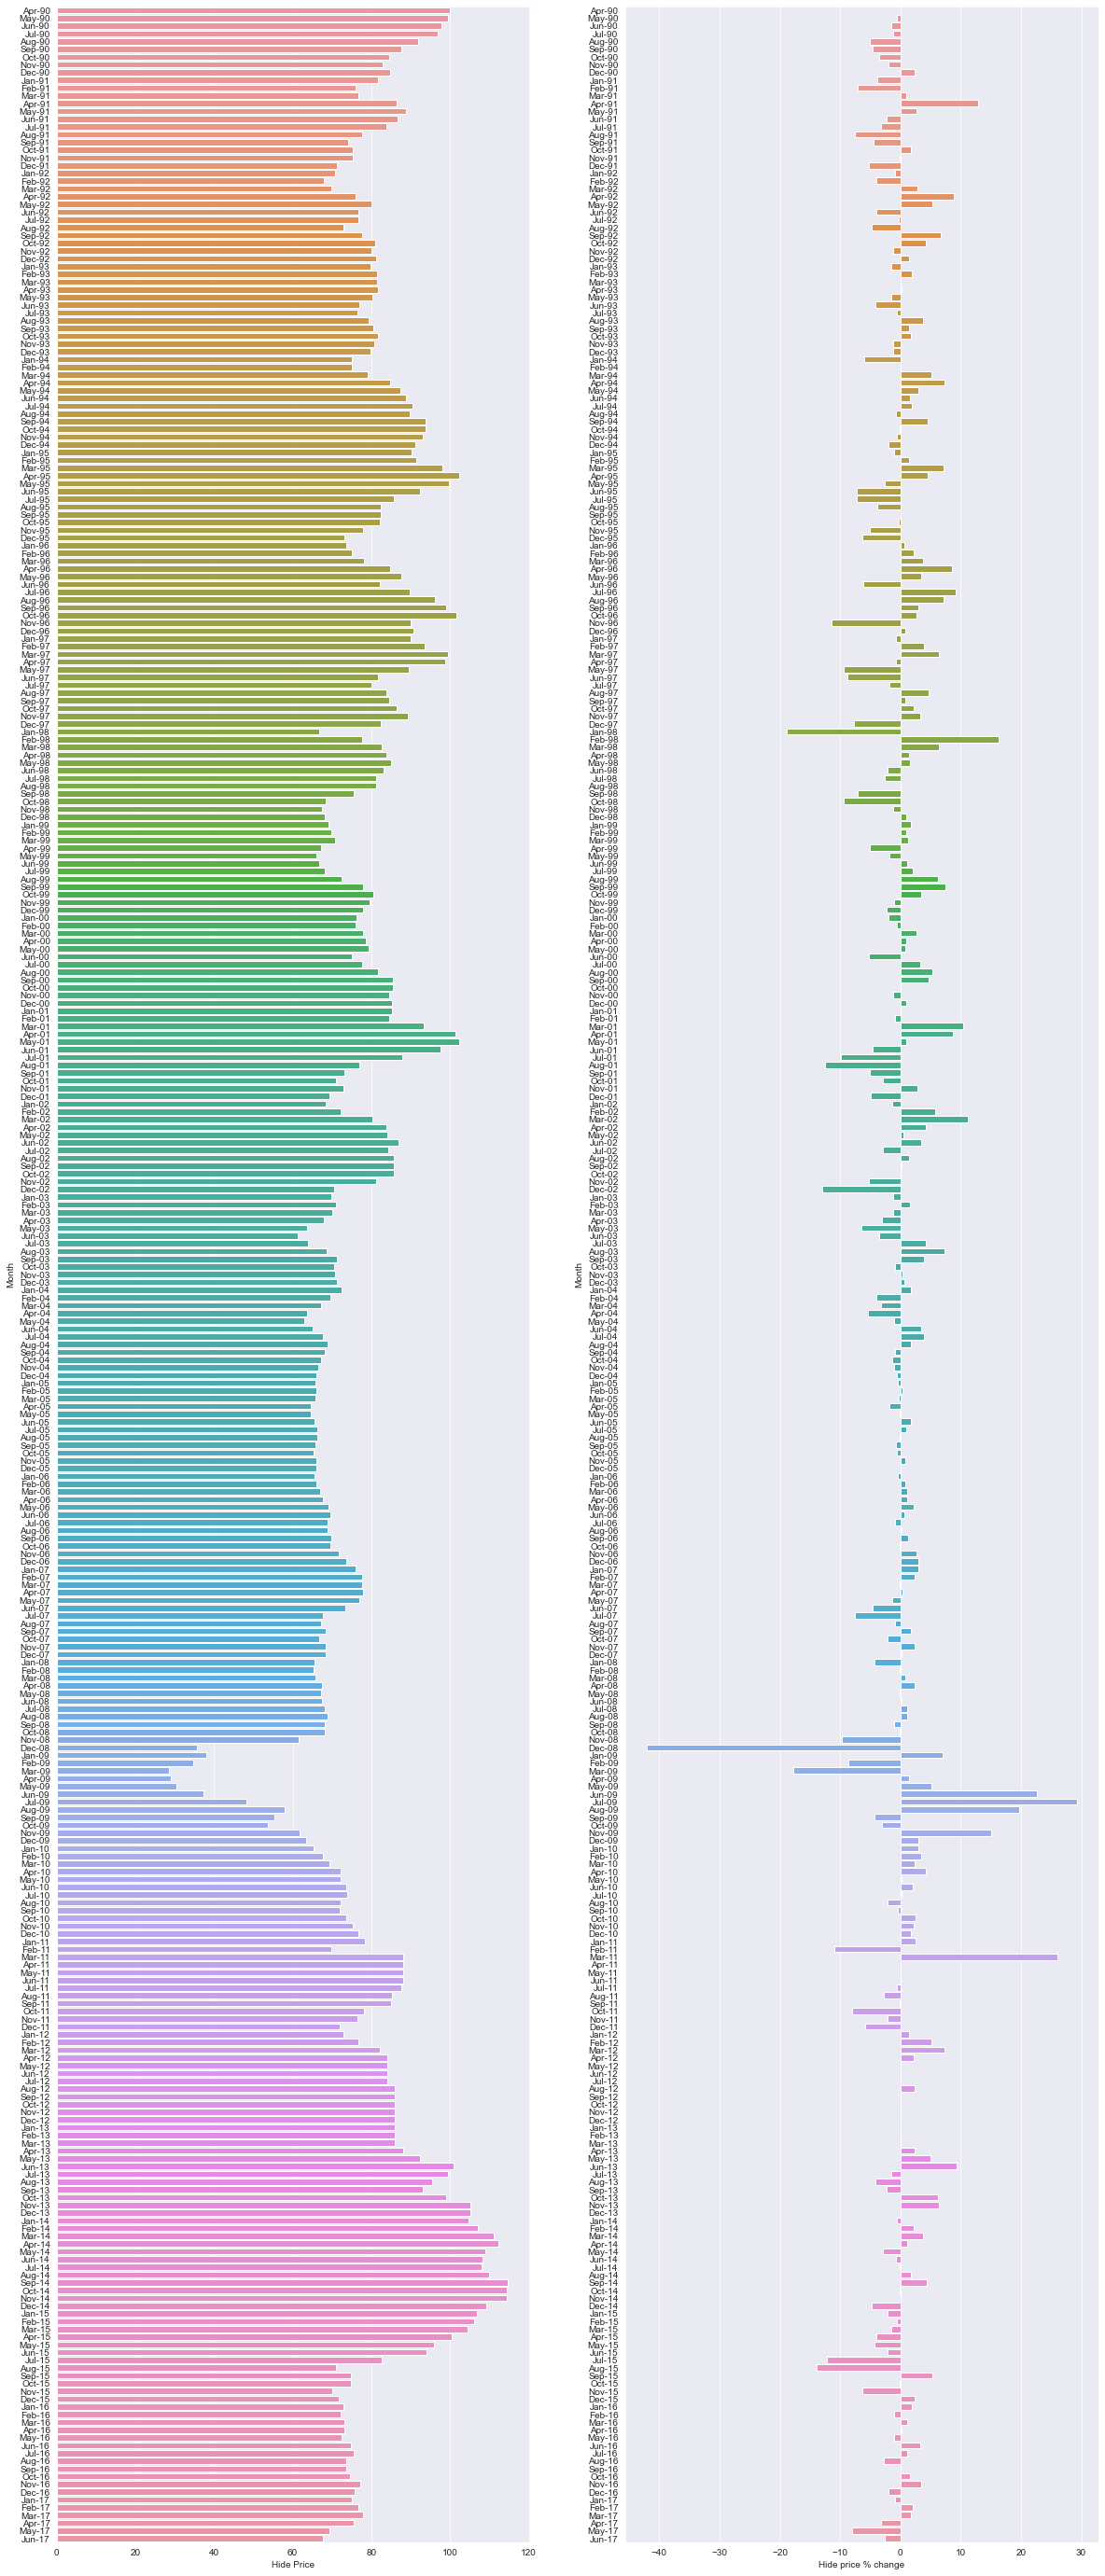

In [102]:
hide = prices_df[prices_df['Hide Price'].notna()][['Month', 'Hide Price', 'Hide price % change', 'month_name', 'year']]

matplotlib.rcParams['font.size'] = 10
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 50))
sns.barplot(x='Hide Price', y='Month', data=hide, orient='h', ax=axes[0])
sns.barplot(x='Hide price % change', y='Month', data=hide, orient='h', ax=axes[1])

Text(0.5, 1.0, 'Average Monthly Price')

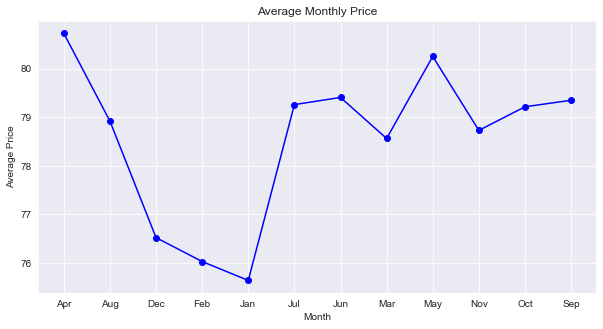

In [103]:
matplotlib.rcParams['figure.figsize'] = (10, 5)
plt.plot(hide.groupby('month_name').mean(), 'bo-')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.title('Average Monthly Price')

Text(0.5, 1.0, 'Average Yearly Price')

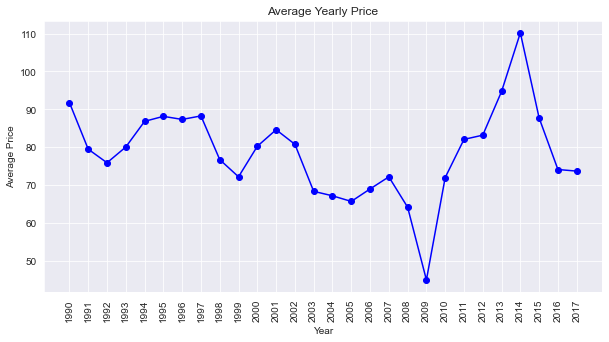

In [104]:
matplotlib.rcParams['figure.figsize'] = (10, 5)
plt.plot(hide.groupby('year').mean(), 'bo-')
plt.xticks(rotation='vertical')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.title('Average Yearly Price')

Next is `Plywood`

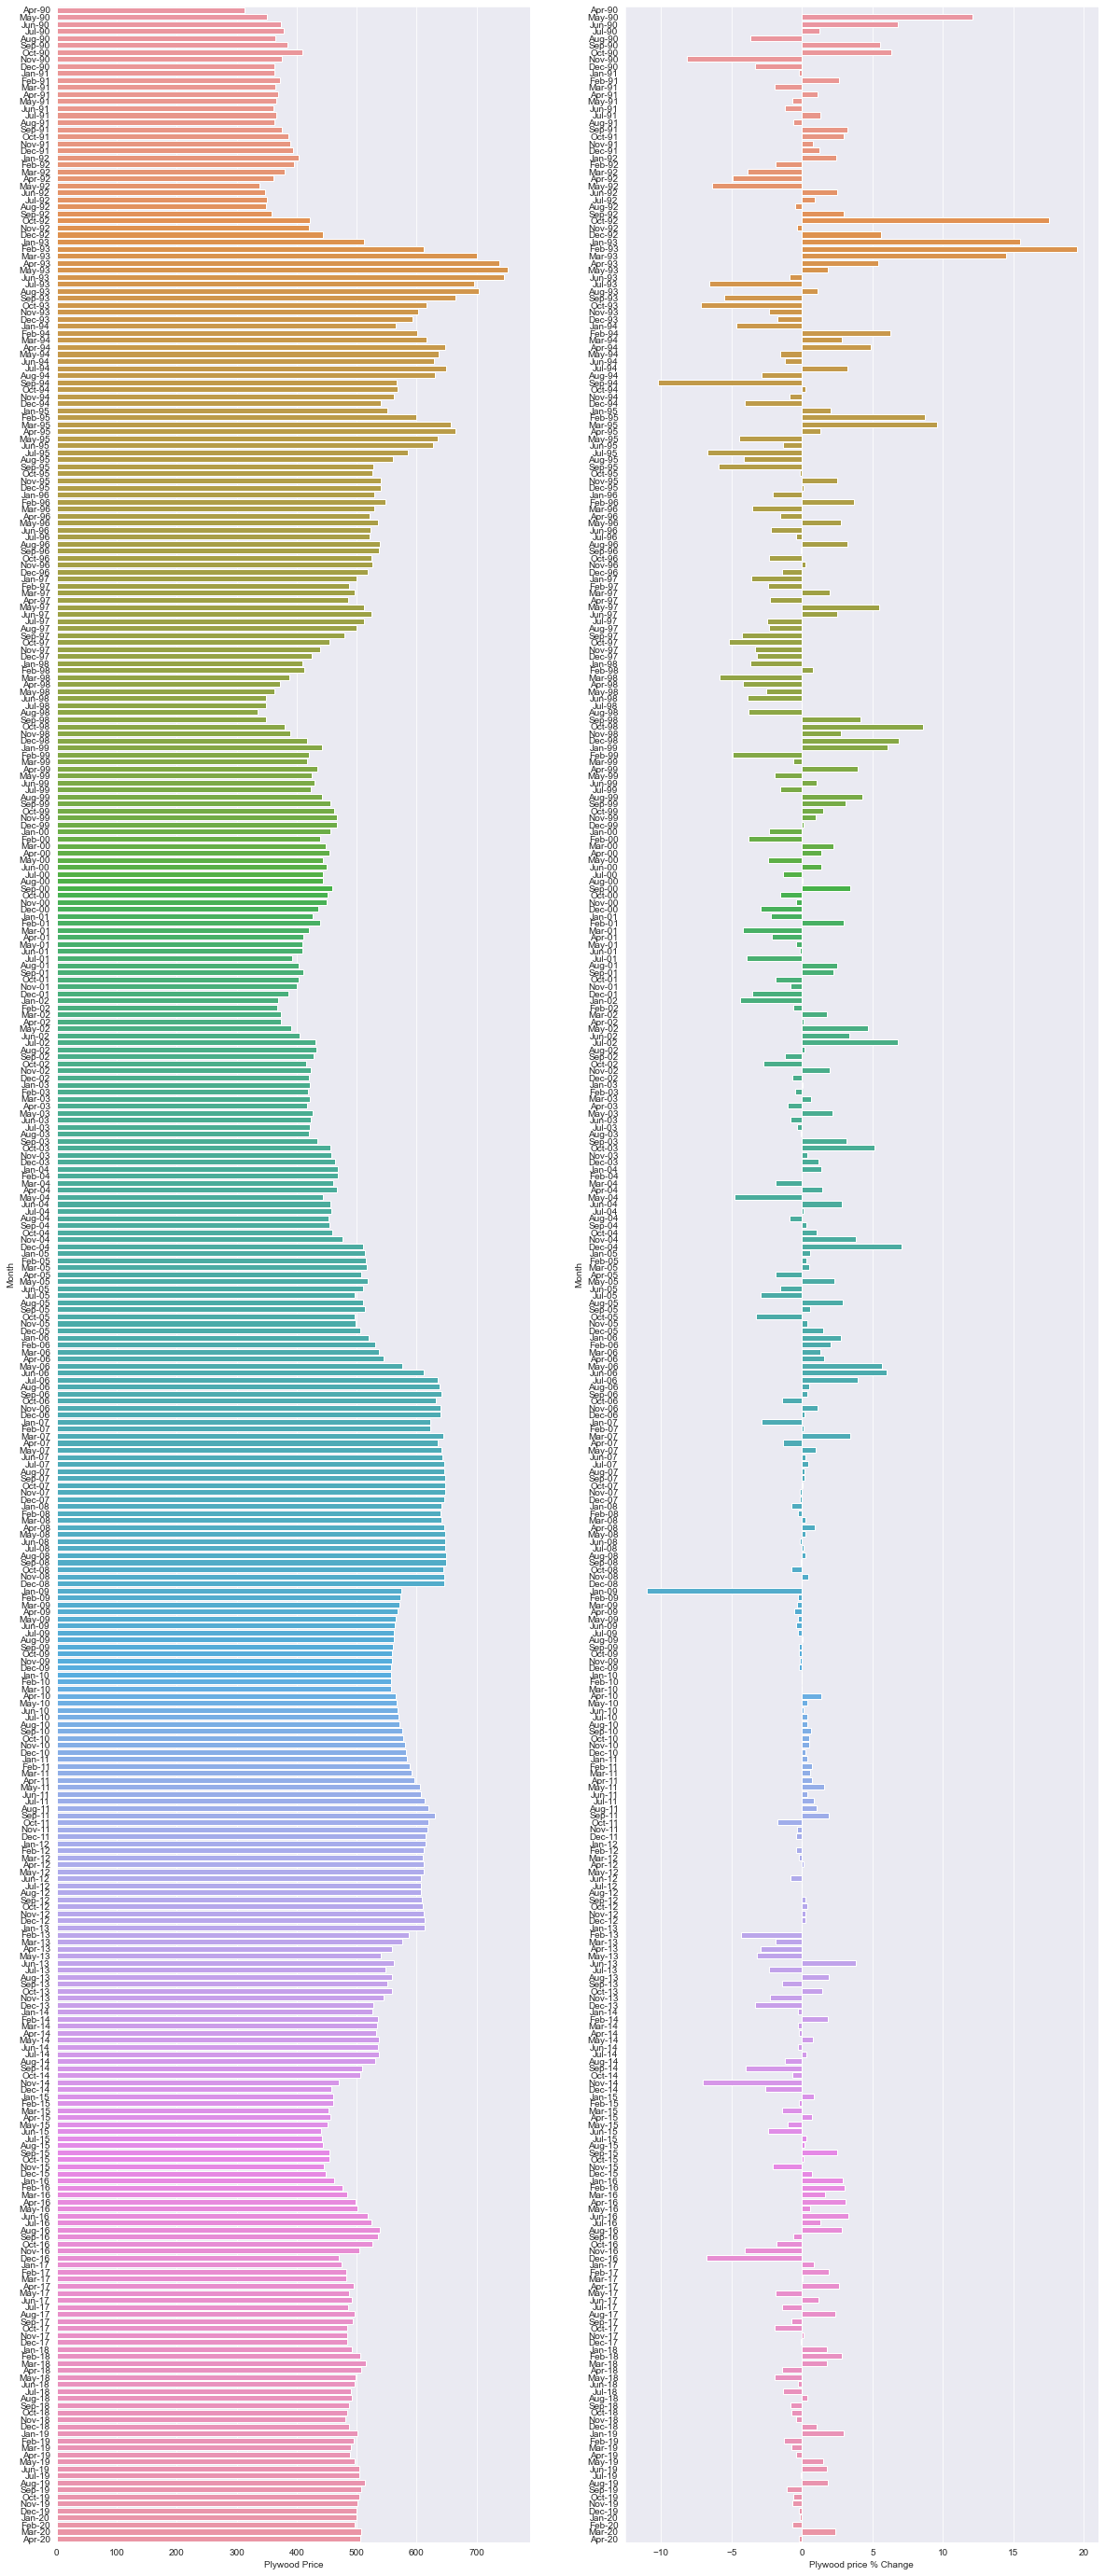

In [106]:
plywood = prices_df[prices_df['Plywood Price'].notna()][['Month', 'Plywood Price', 'Plywood price % Change', 'month_name', 'year']]

matplotlib.rcParams['font.size'] = 10
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 50))
sns.barplot(x='Plywood Price', y='Month', data=plywood, orient='h', ax=axes[0])
sns.barplot(x='Plywood price % Change', y='Month', data=plywood, orient='h', ax=axes[1])

Text(0.5, 1.0, 'Average Monthly Price')

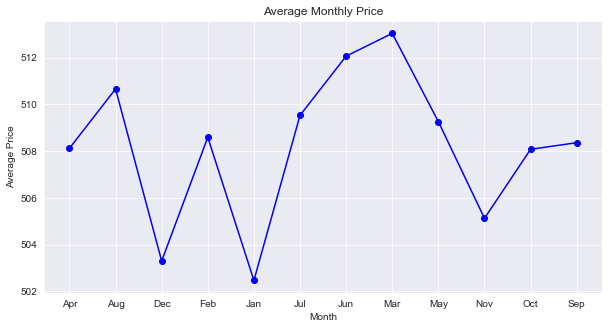

In [107]:
matplotlib.rcParams['figure.figsize'] = (10, 5)
plt.plot(plywood.groupby('month_name').mean(), 'bo-')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.title('Average Monthly Price')

Text(0.5, 1.0, 'Average Yearly Price')

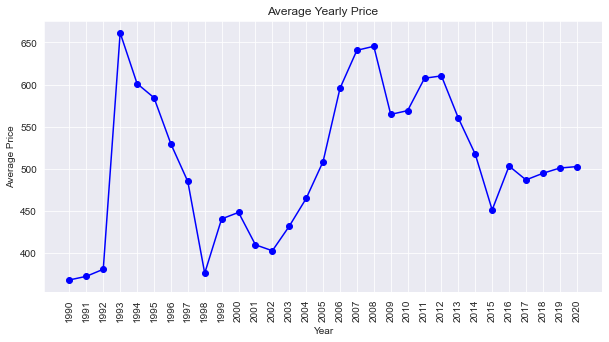

In [108]:
matplotlib.rcParams['figure.figsize'] = (10, 5)
plt.plot(plywood.groupby('year').mean(), 'bo-')
plt.xticks(rotation='vertical')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.title('Average Yearly Price')

Next is `Rubber`

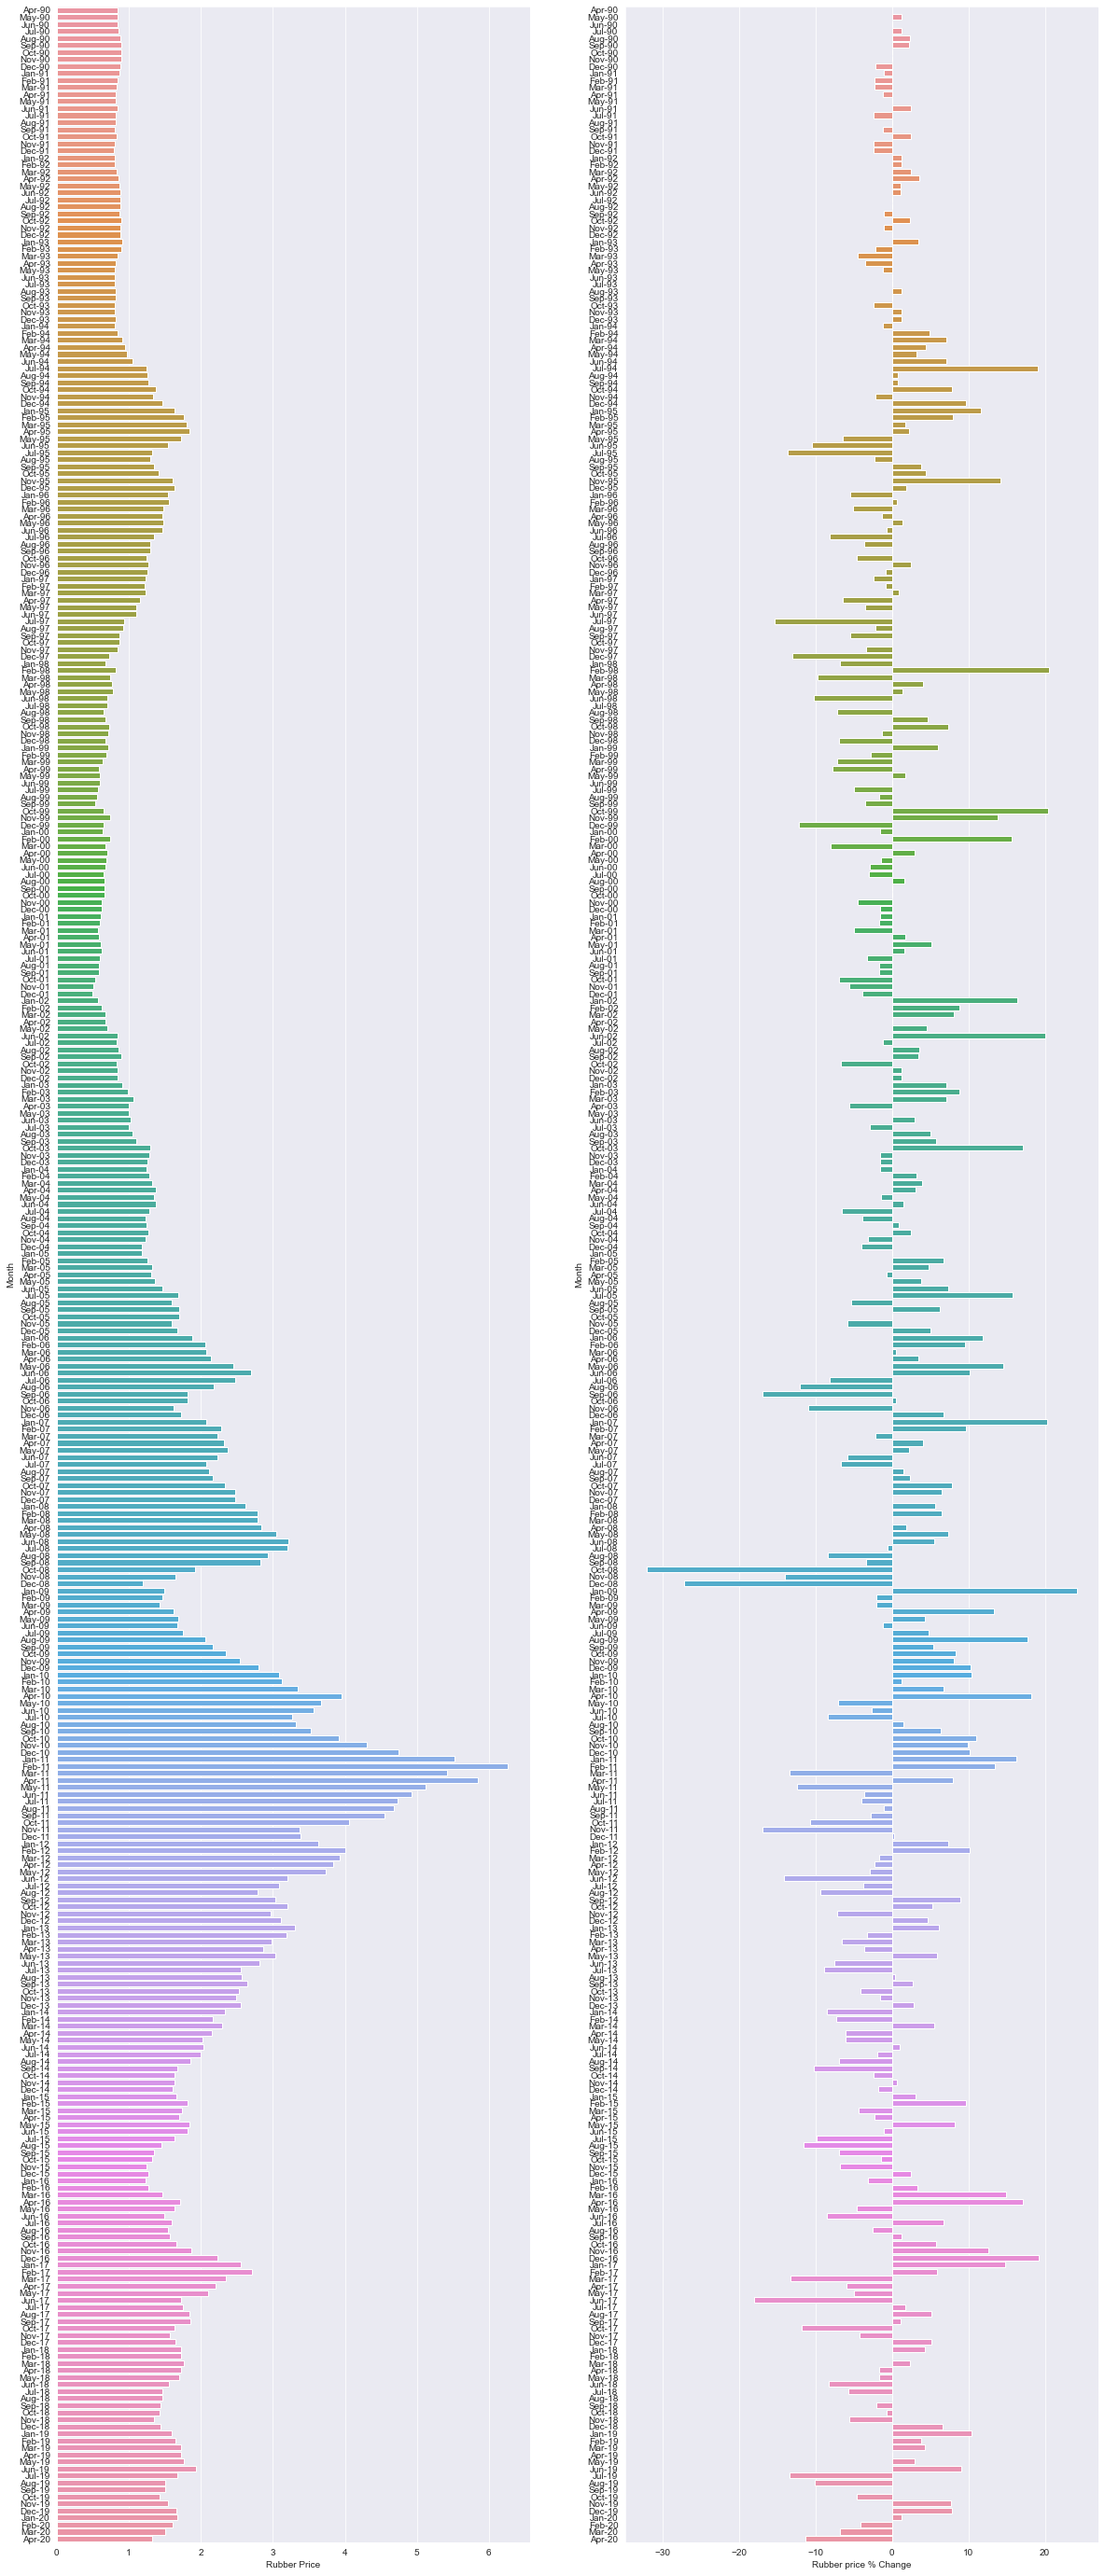

In [109]:
rubber = prices_df[prices_df['Rubber Price'].notna()][['Month', 'Rubber Price', 'Rubber price % Change', 'month_name', 'year']]

matplotlib.rcParams['font.size'] = 10
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 50))
sns.barplot(x='Rubber Price', y='Month', data=rubber, orient='h', ax=axes[0])
sns.barplot(x='Rubber price % Change', y='Month', data=rubber, orient='h', ax=axes[1])

Text(0.5, 1.0, 'Average Monthly Price')

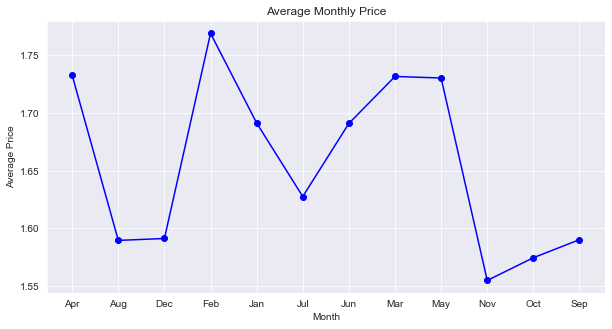

In [110]:
matplotlib.rcParams['figure.figsize'] = (10, 5)
plt.plot(rubber.groupby('month_name').mean(), 'bo-')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.title('Average Monthly Price')

Text(0.5, 1.0, 'Average Yearly Price')

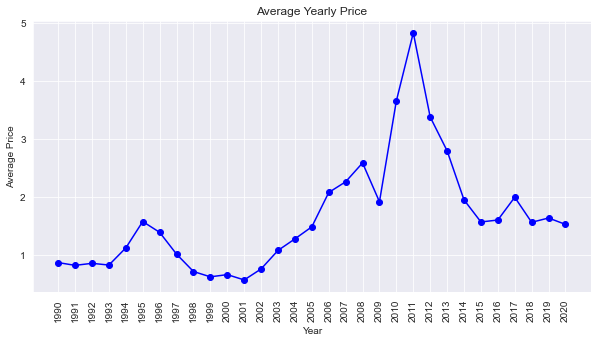

In [111]:
matplotlib.rcParams['figure.figsize'] = (10, 5)
plt.plot(rubber.groupby('year').mean(), 'bo-')
plt.xticks(rotation='vertical')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.title('Average Yearly Price')

Next is `Soft Log`

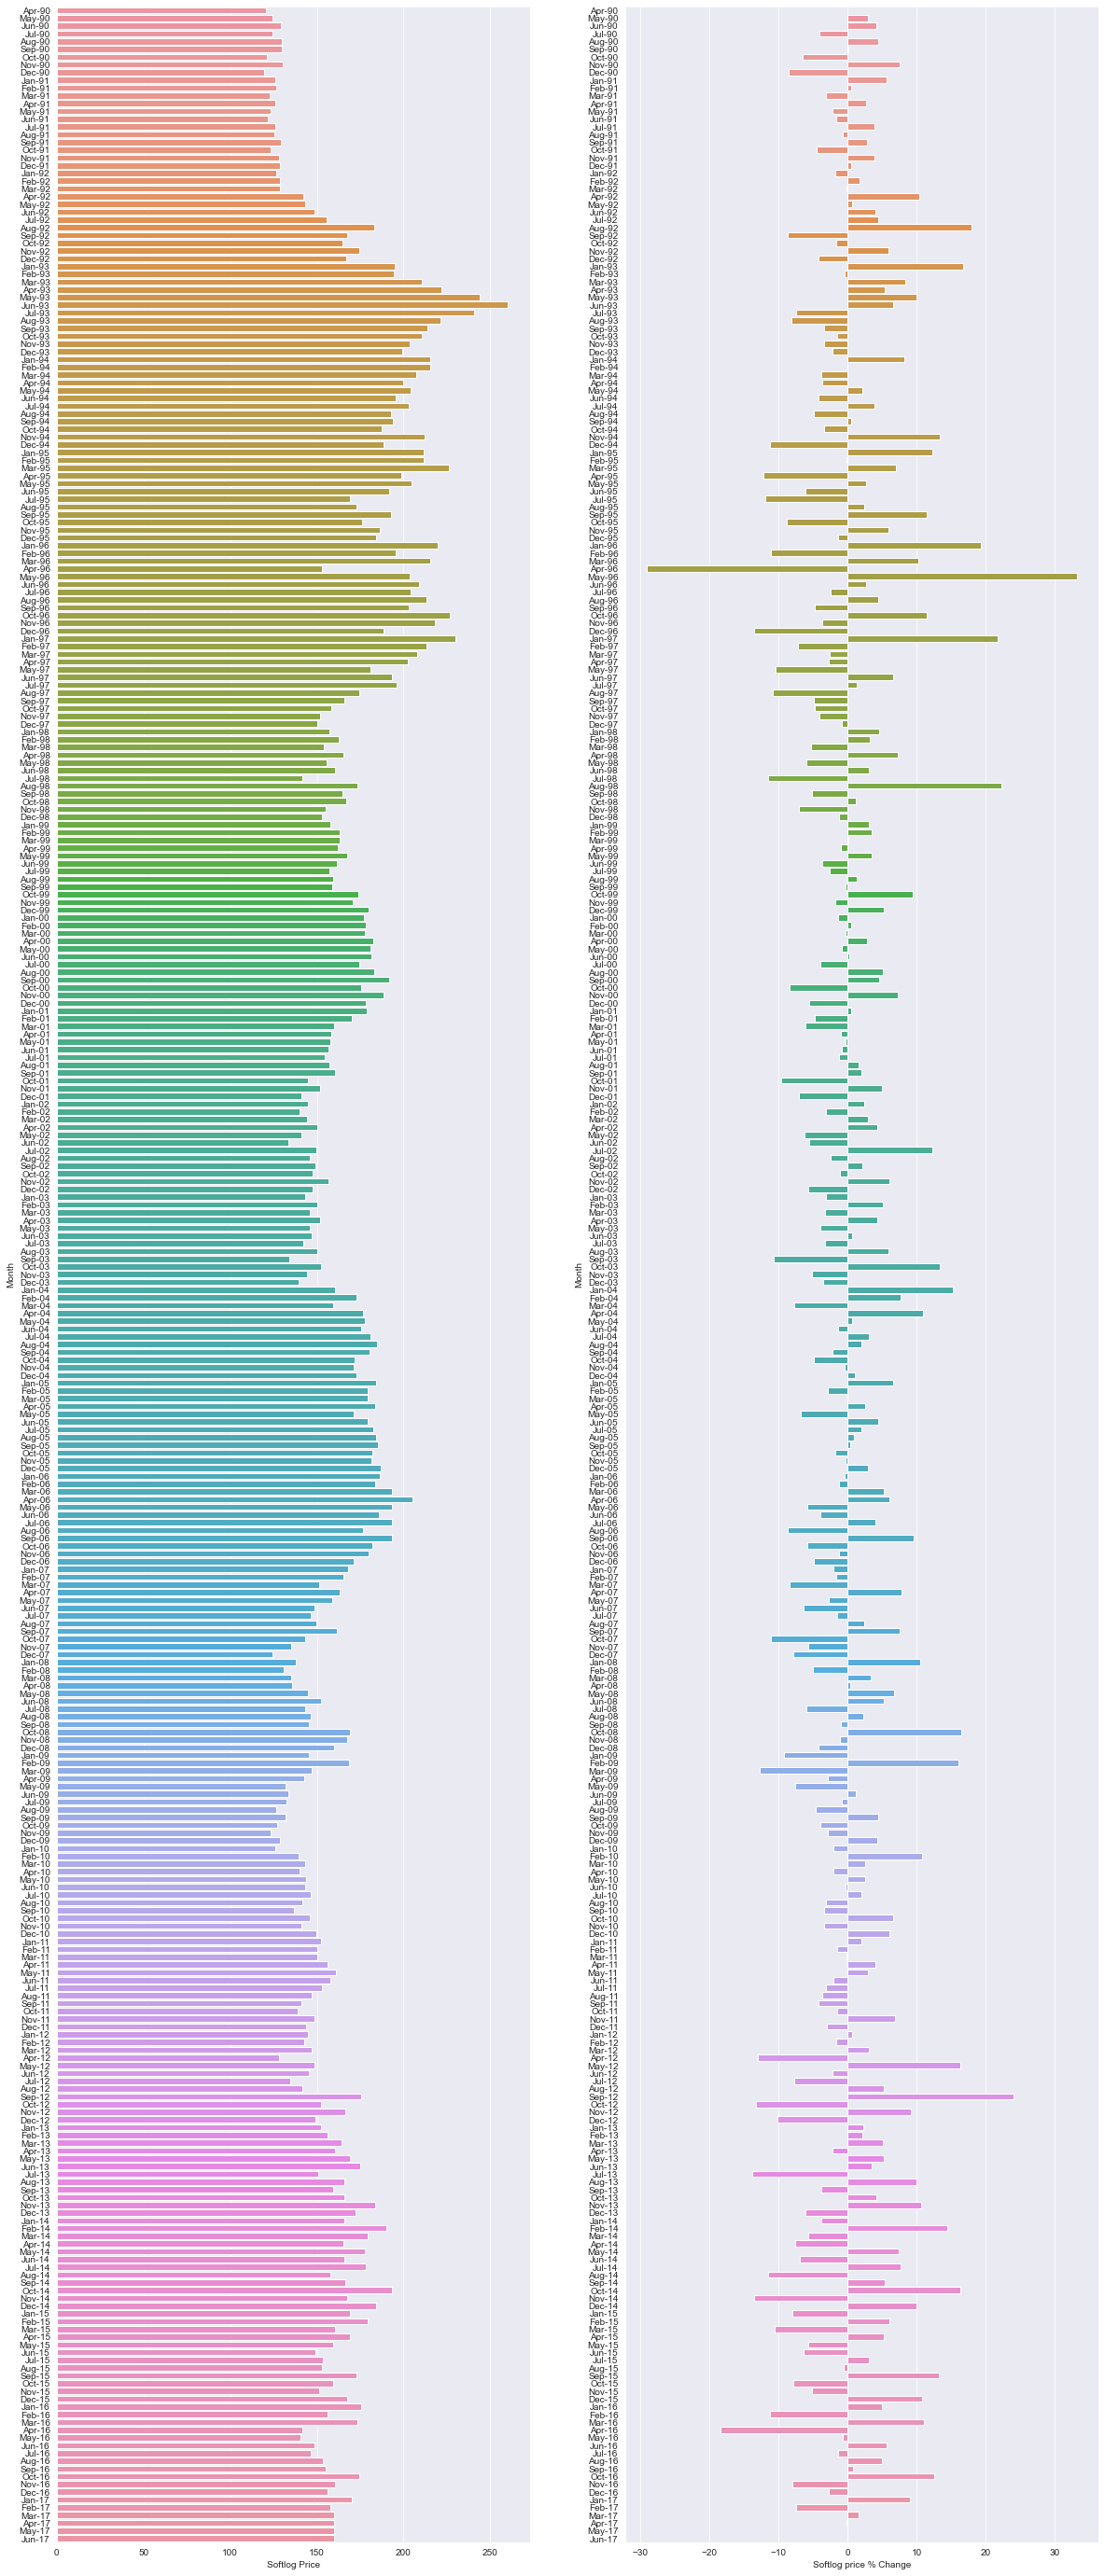

In [113]:
softlog = prices_df[prices_df['Softlog Price'].notna()][['Month', 'Softlog Price', 'Softlog price % Change', 'month_name', 'year']]

matplotlib.rcParams['font.size'] = 10
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 50))
sns.barplot(x='Softlog Price', y='Month', data=softlog, orient='h', ax=axes[0])
sns.barplot(x='Softlog price % Change', y='Month', data=softlog, orient='h', ax=axes[1])

Text(0.5, 1.0, 'Average Monthly Price')

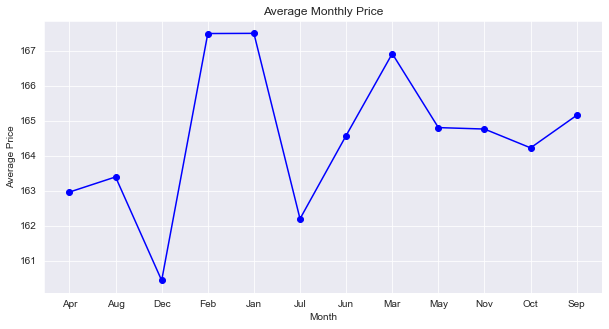

In [114]:
matplotlib.rcParams['figure.figsize'] = (10, 5)
plt.plot(softlog.groupby('month_name').mean(), 'bo-')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.title('Average Monthly Price')

Text(0.5, 1.0, 'Average Yearly Price')

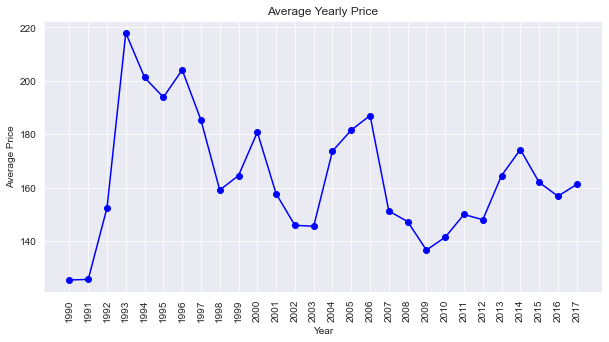

In [115]:
matplotlib.rcParams['figure.figsize'] = (10, 5)
plt.plot(softlog.groupby('year').mean(), 'bo-')
plt.xticks(rotation='vertical')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.title('Average Yearly Price')

Next is `Soft sawnwood`

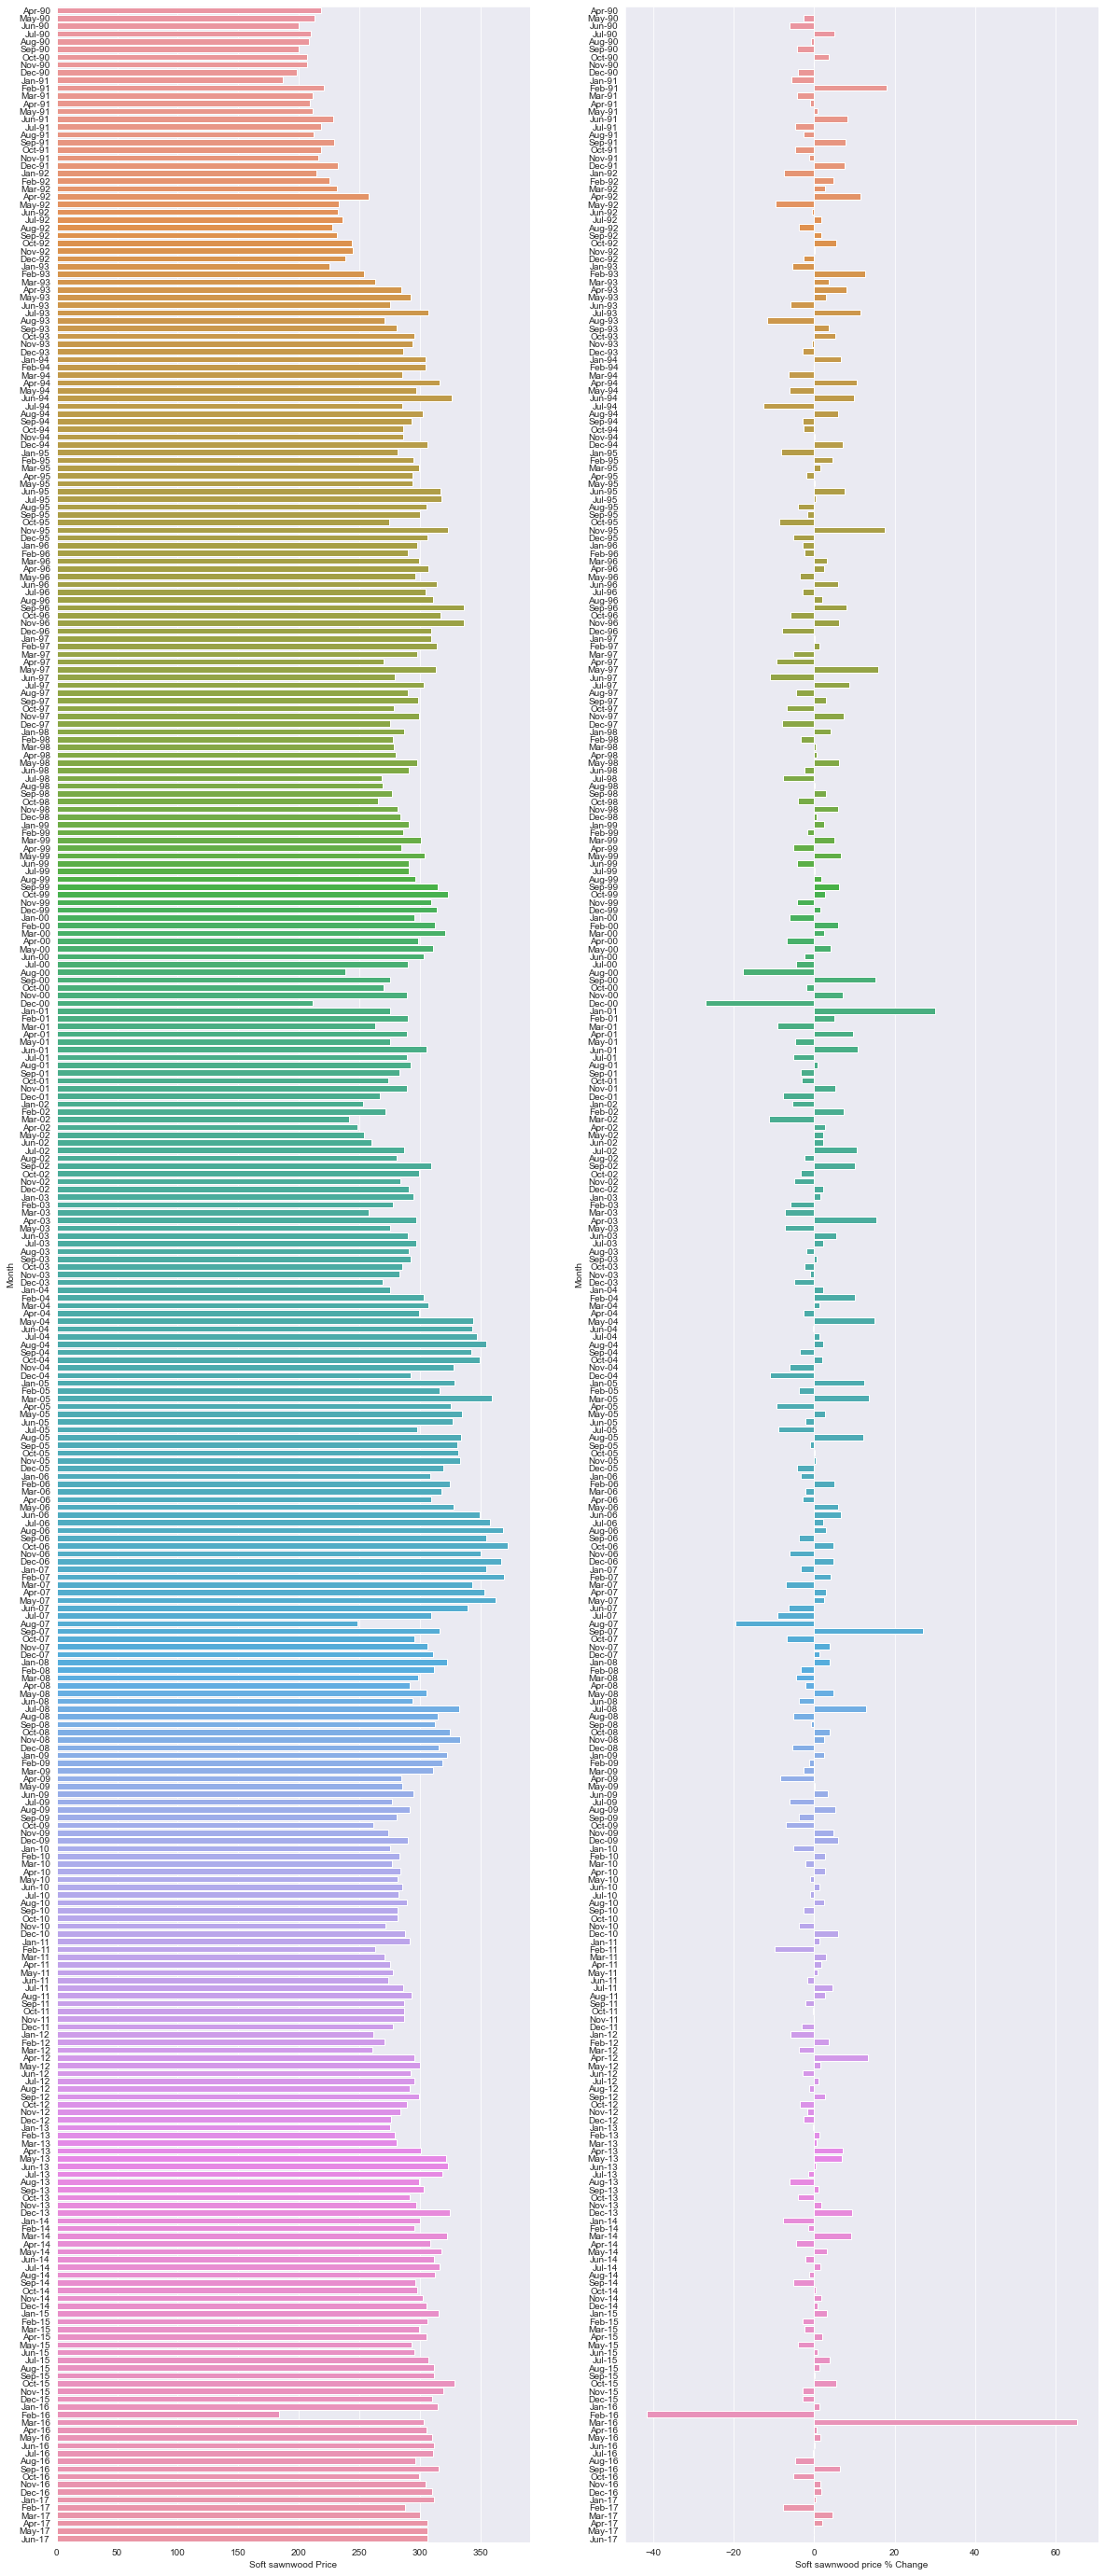

In [117]:
soft_sawnwood = prices_df[prices_df['Soft sawnwood Price'].notna()][['Month', 'Soft sawnwood Price', 'Soft sawnwood price % Change', 'month_name', 'year']]

matplotlib.rcParams['font.size'] = 10
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 50))
sns.barplot(x='Soft sawnwood Price', y='Month', data=soft_sawnwood, orient='h', ax=axes[0])
sns.barplot(x='Soft sawnwood price % Change', y='Month', data=soft_sawnwood, orient='h', ax=axes[1])

Text(0.5, 1.0, 'Average Monthly Price')

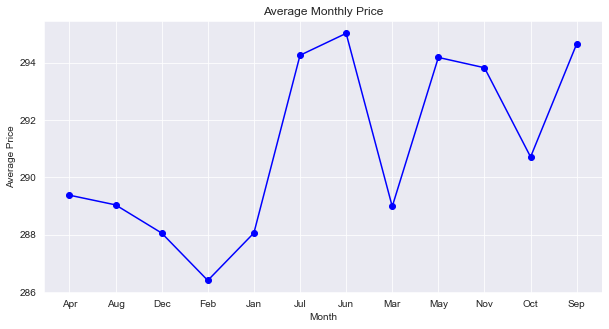

In [118]:
matplotlib.rcParams['figure.figsize'] = (10, 5)
plt.plot(soft_sawnwood.groupby('month_name').mean(), 'bo-')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.title('Average Monthly Price')

Text(0.5, 1.0, 'Average Yearly Price')

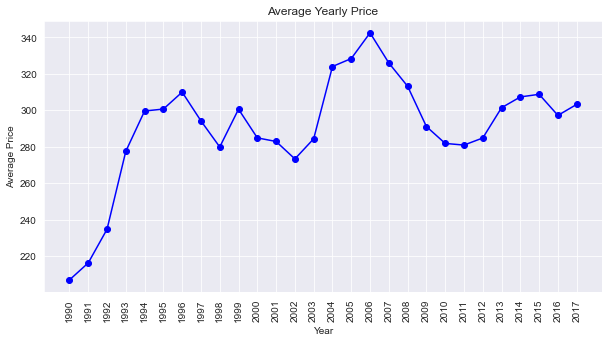

In [119]:
matplotlib.rcParams['figure.figsize'] = (10, 5)
plt.plot(soft_sawnwood.groupby('year').mean(), 'bo-')
plt.xticks(rotation='vertical')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.title('Average Yearly Price')

And the Last is `Wood pulp`

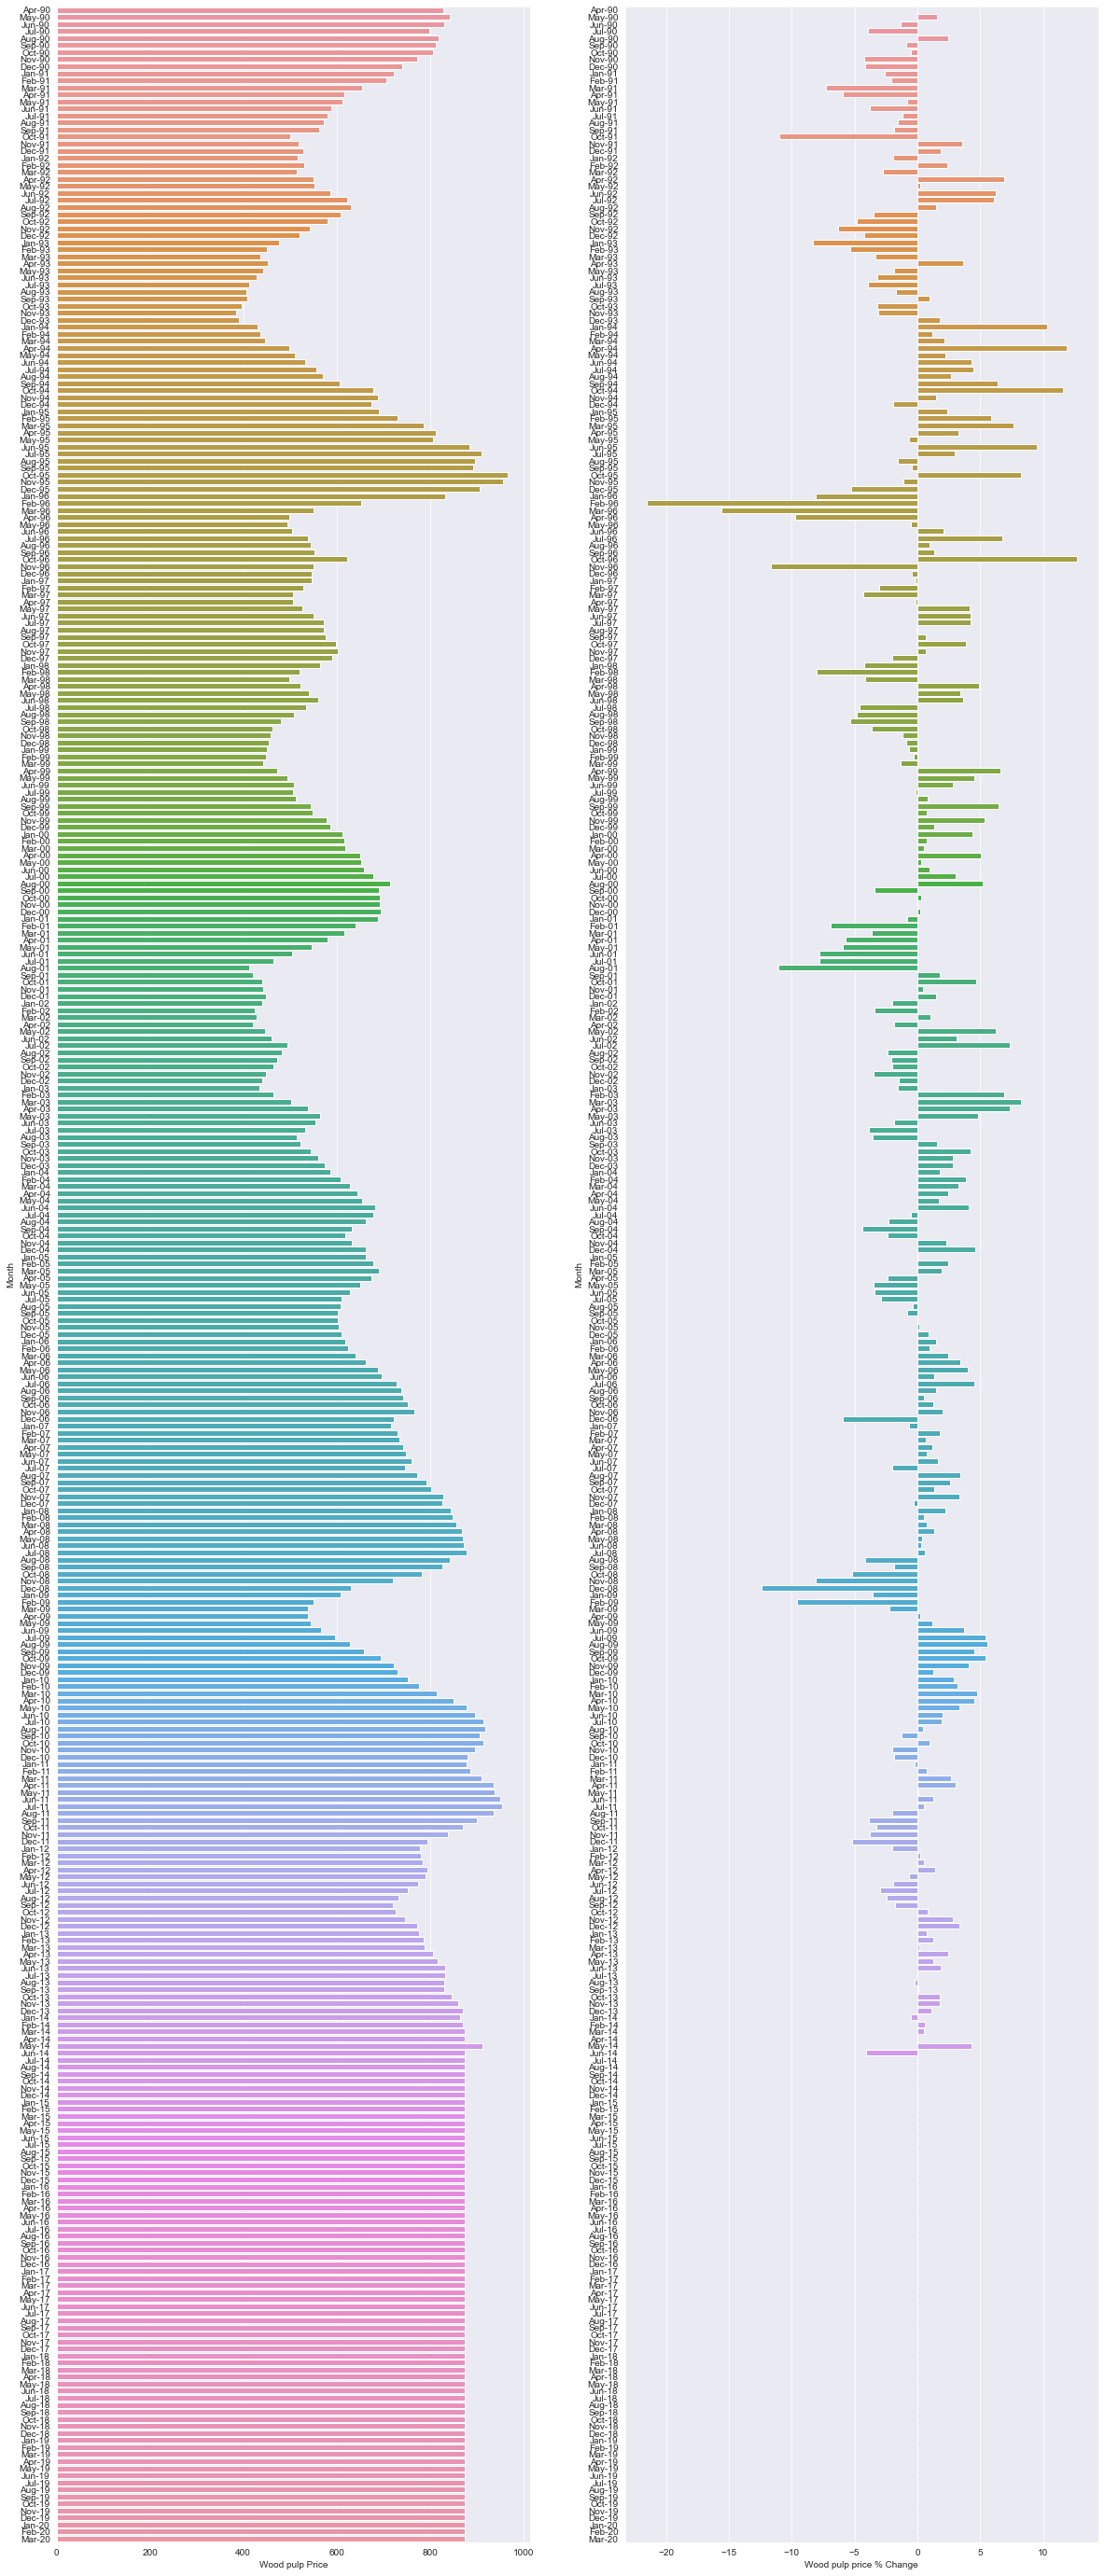

In [120]:
wood_pulp = prices_df[prices_df['Wood pulp Price'].notna()][['Month', 'Wood pulp Price', 'Wood pulp price % Change', 'month_name', 'year']]

matplotlib.rcParams['font.size'] = 10
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 50))
sns.barplot(x='Wood pulp Price', y='Month', data=wood_pulp, orient='h', ax=axes[0])
sns.barplot(x='Wood pulp price % Change', y='Month', data=wood_pulp, orient='h', ax=axes[1])

Text(0.5, 1.0, 'Average Monthly Price')

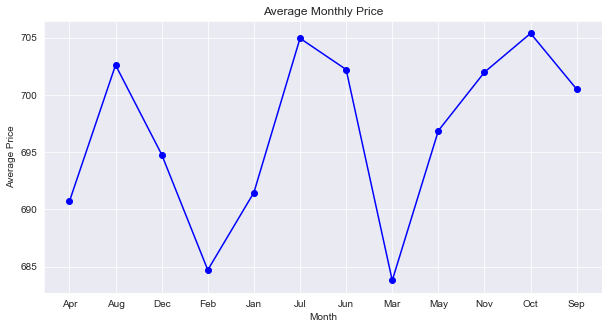

In [121]:
matplotlib.rcParams['figure.figsize'] = (10, 5)
plt.plot(wood_pulp.groupby('month_name').mean(), 'bo-')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.title('Average Monthly Price')

Text(0.5, 1.0, 'Average Yearly Price')

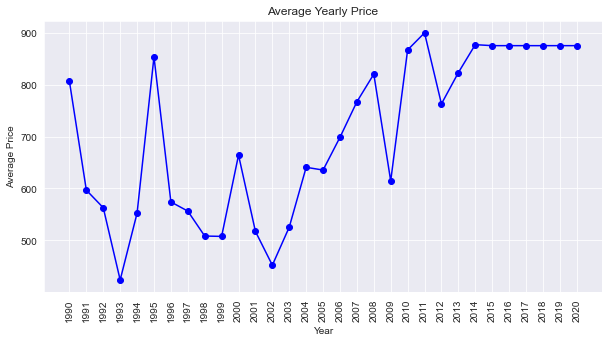

In [122]:
matplotlib.rcParams['figure.figsize'] = (10, 5)
plt.plot(wood_pulp.groupby('year').mean(), 'bo-')
plt.xticks(rotation='vertical')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.title('Average Yearly Price')

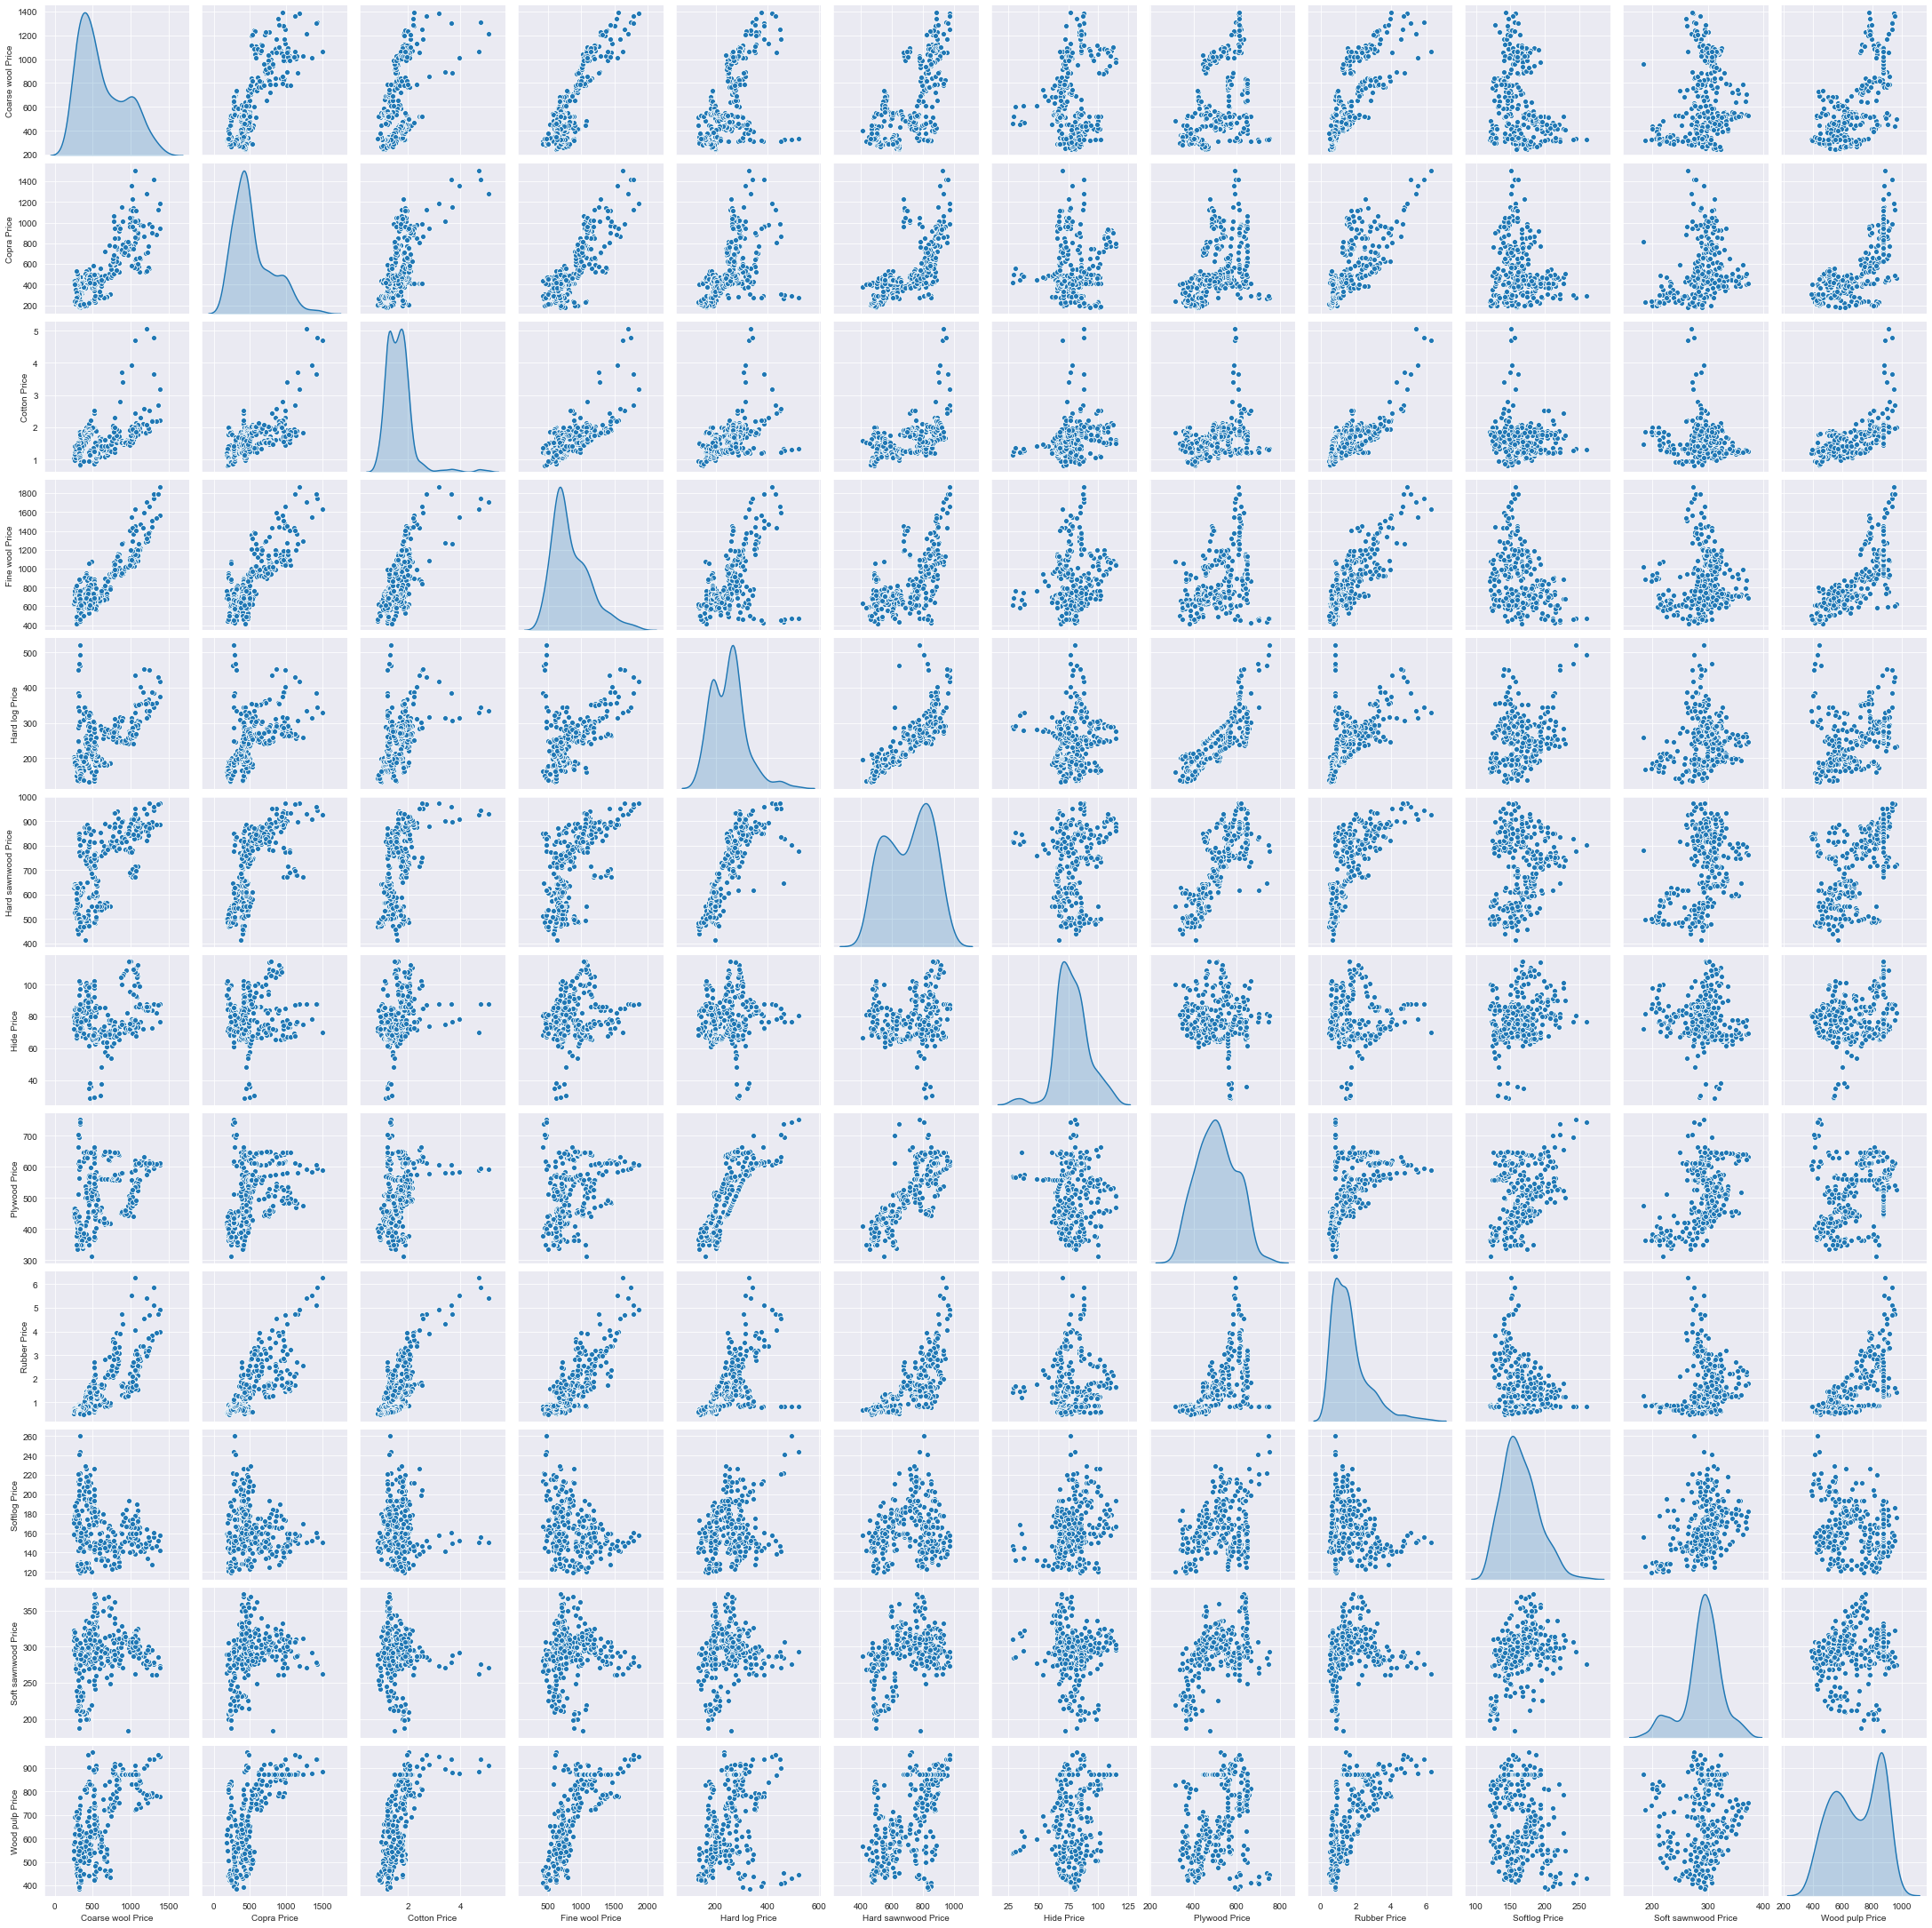

In [135]:
sns.pairplot(data=prices_df[['Coarse wool Price', 'Copra Price','Cotton Price', 'Fine wool Price', 'Hard log Price', 'Hard sawnwood Price',
                 'Hide Price', 'Plywood Price', 'Rubber Price', 'Softlog Price', 'Soft sawnwood Price','Wood pulp Price']], diag_kind='kde')

In [125]:
correlation = prices_df[['Coarse wool Price', 'Copra Price','Cotton Price', 'Fine wool Price', 'Hard log Price', 'Hard sawnwood Price',
                 'Hide Price', 'Plywood Price', 'Rubber Price', 'Softlog Price', 'Soft sawnwood Price','Wood pulp Price']].corr()

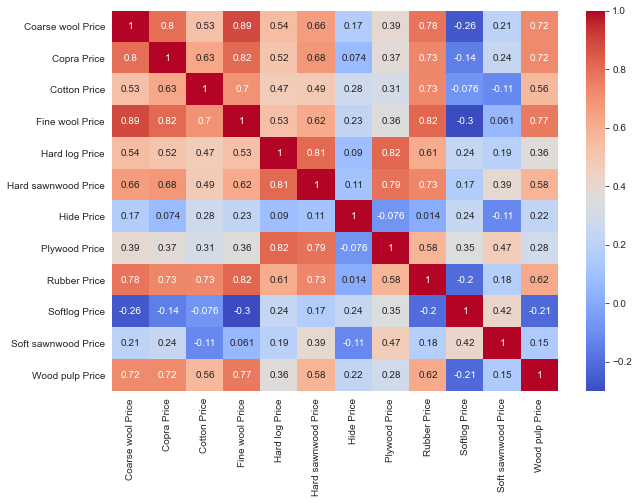

In [134]:
matplotlib.rcParams['figure.figsize'] = (10, 7)
sns.heatmap(correlation, annot=True, cmap='coolwarm' )

As ploting and EDA is done let's now commit our work to Jovian

In [139]:
import jovian
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "adhikarisayanta/agricultural-raw-material-prices" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/adhikarisayanta/agricultural-raw-material-prices


'https://jovian.ml/adhikarisayanta/agricultural-raw-material-prices'